Q.1) Medical cost personal insurance project-

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [183]:
#importing the data-

In [289]:
df= pd.read_csv(r'C:\Users\prate\medical_cost_insurance.csv')

In [290]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [186]:
df.shape

(1338, 7)

here we can see the data set contains 1338 rows and 7 columns.

In [187]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

here we can see the data types of the each columns here we can see that the independent column has object data also which we 
need to be encode later like sex, smoker and region column.

In [188]:
df['charges'].nunique()

1337

here we can see that the no of unique values are 1337 out of 1338 samples which means it is a regression problem.

In [189]:
df.nunique().to_frame('No of unique values')

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


about the data- 

1. The age column has unit in years.
2. sex,smoker,region column we need to encode to move further to get the insights of data.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


data types are float,int,object in the dataset.

In [191]:
#checking null values

In [192]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [193]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


here we can see that there are no null values in the data.

<AxesSubplot:>

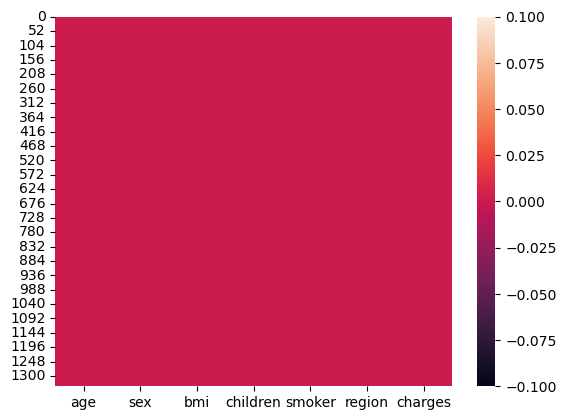

In [194]:
sns.heatmap(df.isnull())

it is now confirmed that the there is no null values present in the data.

In [195]:
#separating continous data columns & catergorical data columns-

In [196]:
continous_data=[]

for i in df.columns:
    if df[i].dtypes != 'object':
        continous_data.append(i)
continous_data        

['age', 'bmi', 'children', 'charges']

In [197]:
categorical_data=[]

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_data.append(i)
categorical_data

['sex', 'smoker', 'region']

In [198]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [199]:
# Lets check if duplicated data is present in our dataset-

In [291]:
df.duplicated().sum()

1

In [292]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Here we can see that there are duplicated rows, so we will remove the duplicated rows.

In [293]:
df.drop_duplicates(inplace=True)

In [294]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


so we have removed the duplicated row from the dataset.

In [295]:
#Encoding of data- 

In [296]:
from sklearn.preprocessing import LabelEncoder

In [297]:
oe=LabelEncoder()
df1=oe.fit_transform(df['sex'])
df1

array([0, 1, 1, ..., 0, 0, 0])

In [298]:
oe=LabelEncoder()
df2=oe.fit_transform(df['smoker'])
df2

array([1, 0, 0, ..., 0, 0, 1])

In [299]:
oe=LabelEncoder()
df3=oe.fit_transform(df['region'])
df3

array([3, 2, 2, ..., 2, 3, 1])

In [300]:
df['sex']=df1
df['smoker']=df2
df['region']=df3

In [301]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [107]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

Here we can see that the data has been encoded, so now all data we have is either int or float.

In [108]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


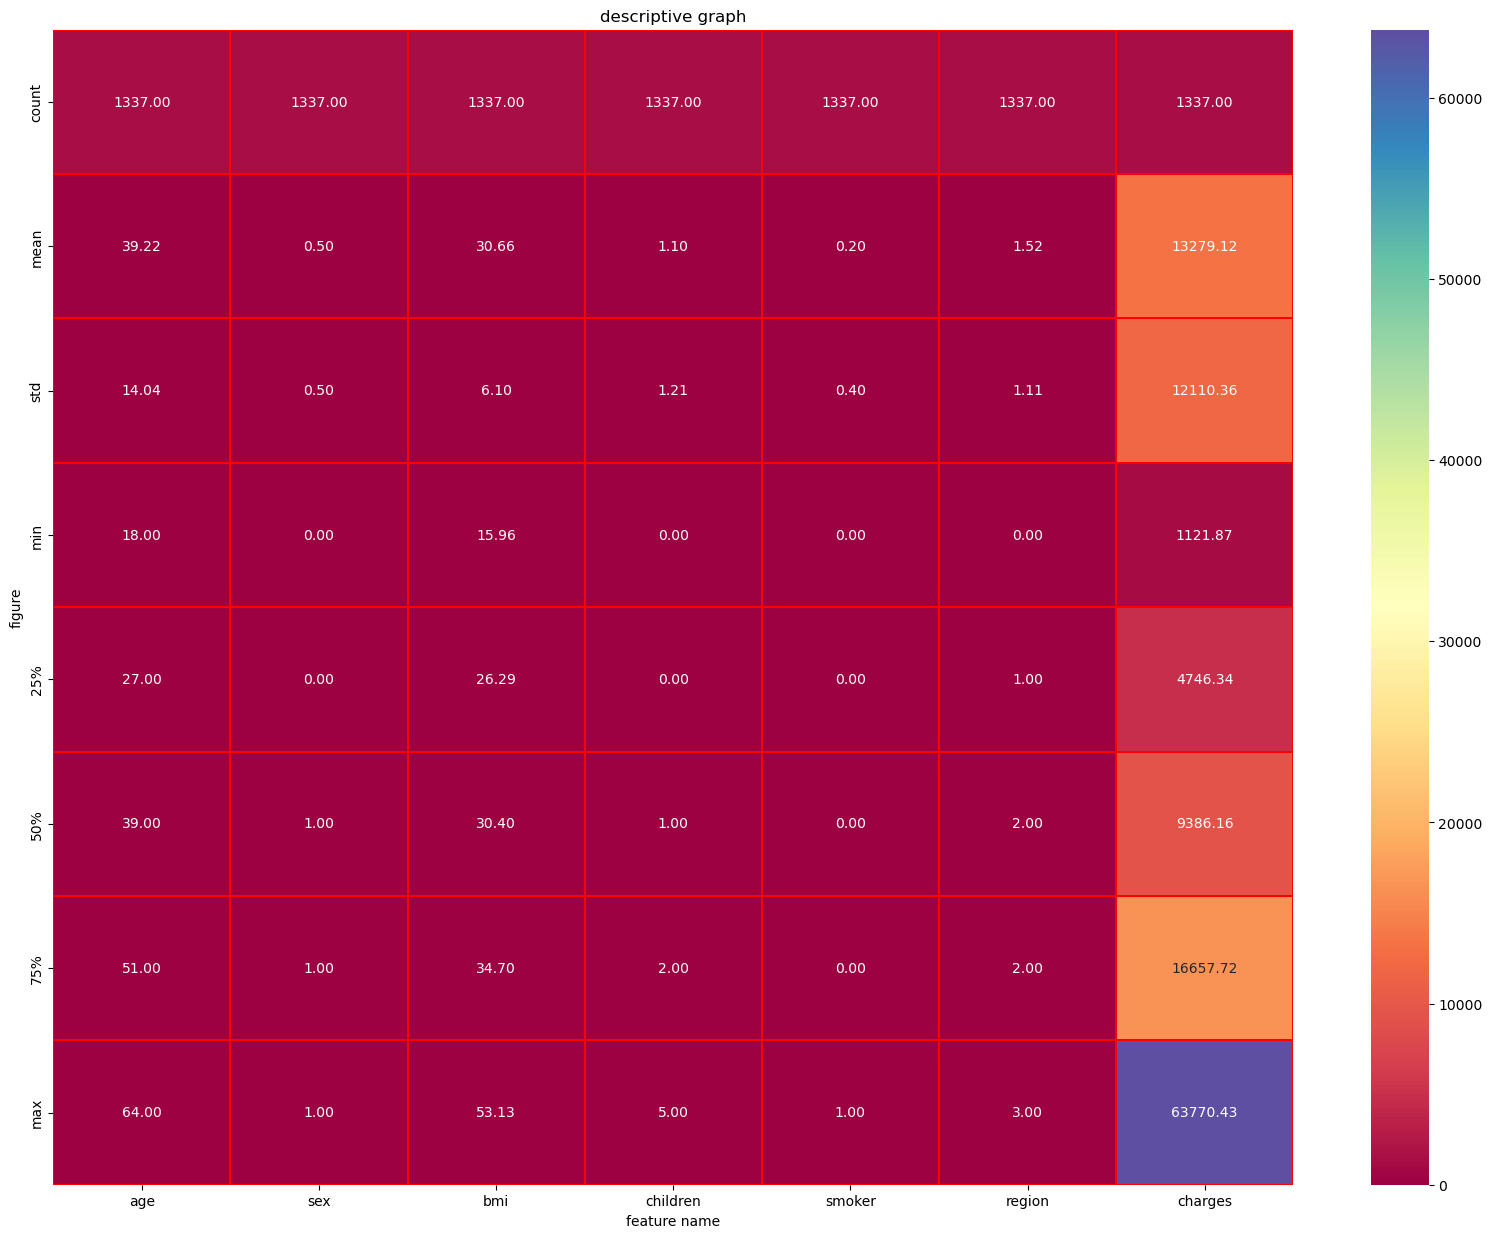

In [109]:
plt.figure(figsize=(20,15))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='red',cmap='Spectral')
plt.xlabel('feature name')
plt.ylabel('figure')  #annot=true will give the numerical values on the graph.
plt.title('descriptive graph')  #fmt='0.2' only two values are allowed after decimal.
plt.show()

Observation-

1. The count is same in all columns that means no null values present in dataset.
2. The Mean is greater than the median in columns like age,bmi,children,smoker which means the data is right skewed in these columns.
3. The Mean is lower than median in columns like sex,region which means data is left skewed in these columns.
4. There is huge diff bw 75% and maximum values in columns like bmi,children,smoker which means there can be outliers present in the data.

In [110]:
#Univariate analysis-

<AxesSubplot:xlabel='sex', ylabel='count'>

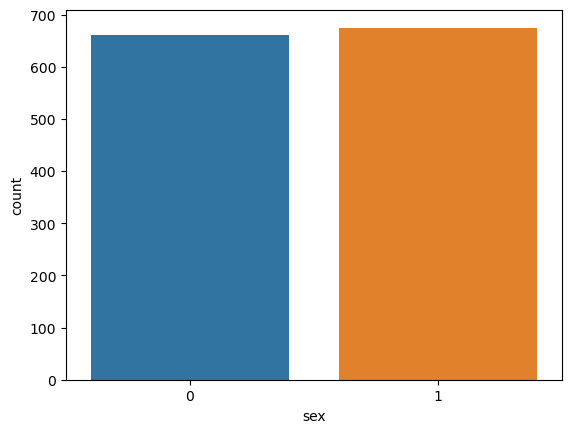

In [111]:
sns.countplot(df.sex)

here we can see that the ratio of male & female is approximately same in the dataset or we can say males are very little high
in numbers.

<AxesSubplot:xlabel='smoker', ylabel='count'>

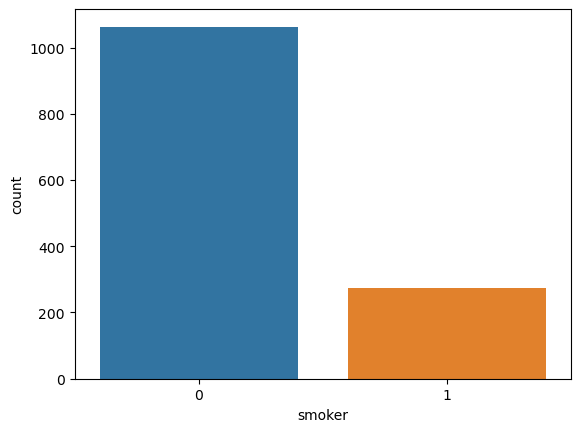

In [112]:
sns.countplot(df.smoker)

Here we can see that the no of non smokers are high in numbers than the number of smokers in the data.

<AxesSubplot:xlabel='children', ylabel='count'>

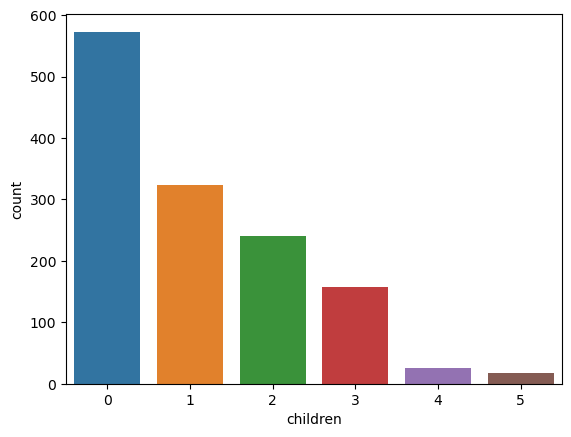

In [113]:
sns.countplot(df.children)

Here we can clearly see that there are more peoples with 0 children covered.

<AxesSubplot:xlabel='age', ylabel='count'>

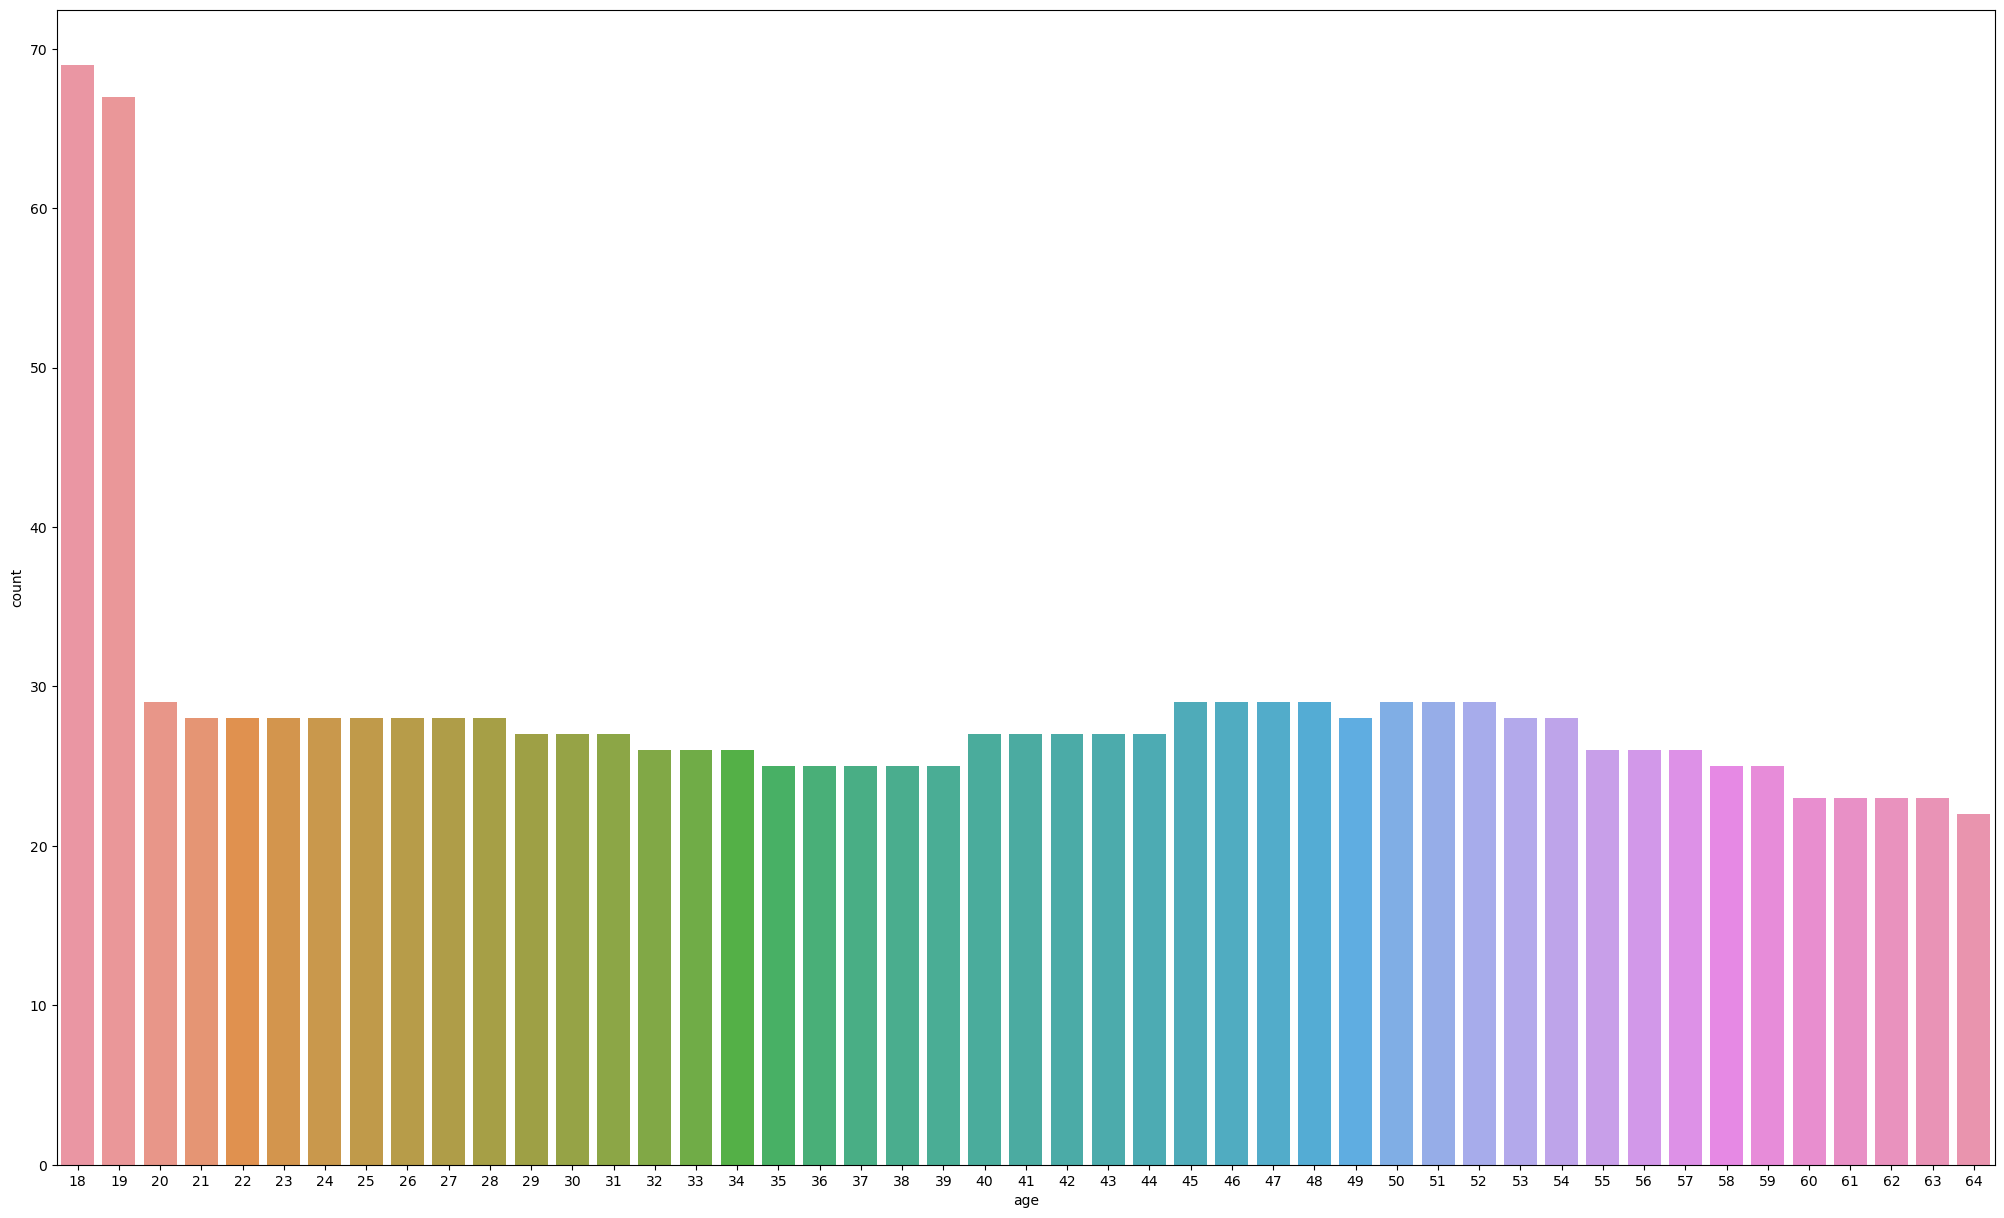

In [114]:
plt.figure(figsize=(25,15))
sns.countplot(df.age)

Here we can clearly see that people with age 18 & 19 are more in numbers & people with age 60 to 64 are very less in numbers.

<AxesSubplot:xlabel='region', ylabel='count'>

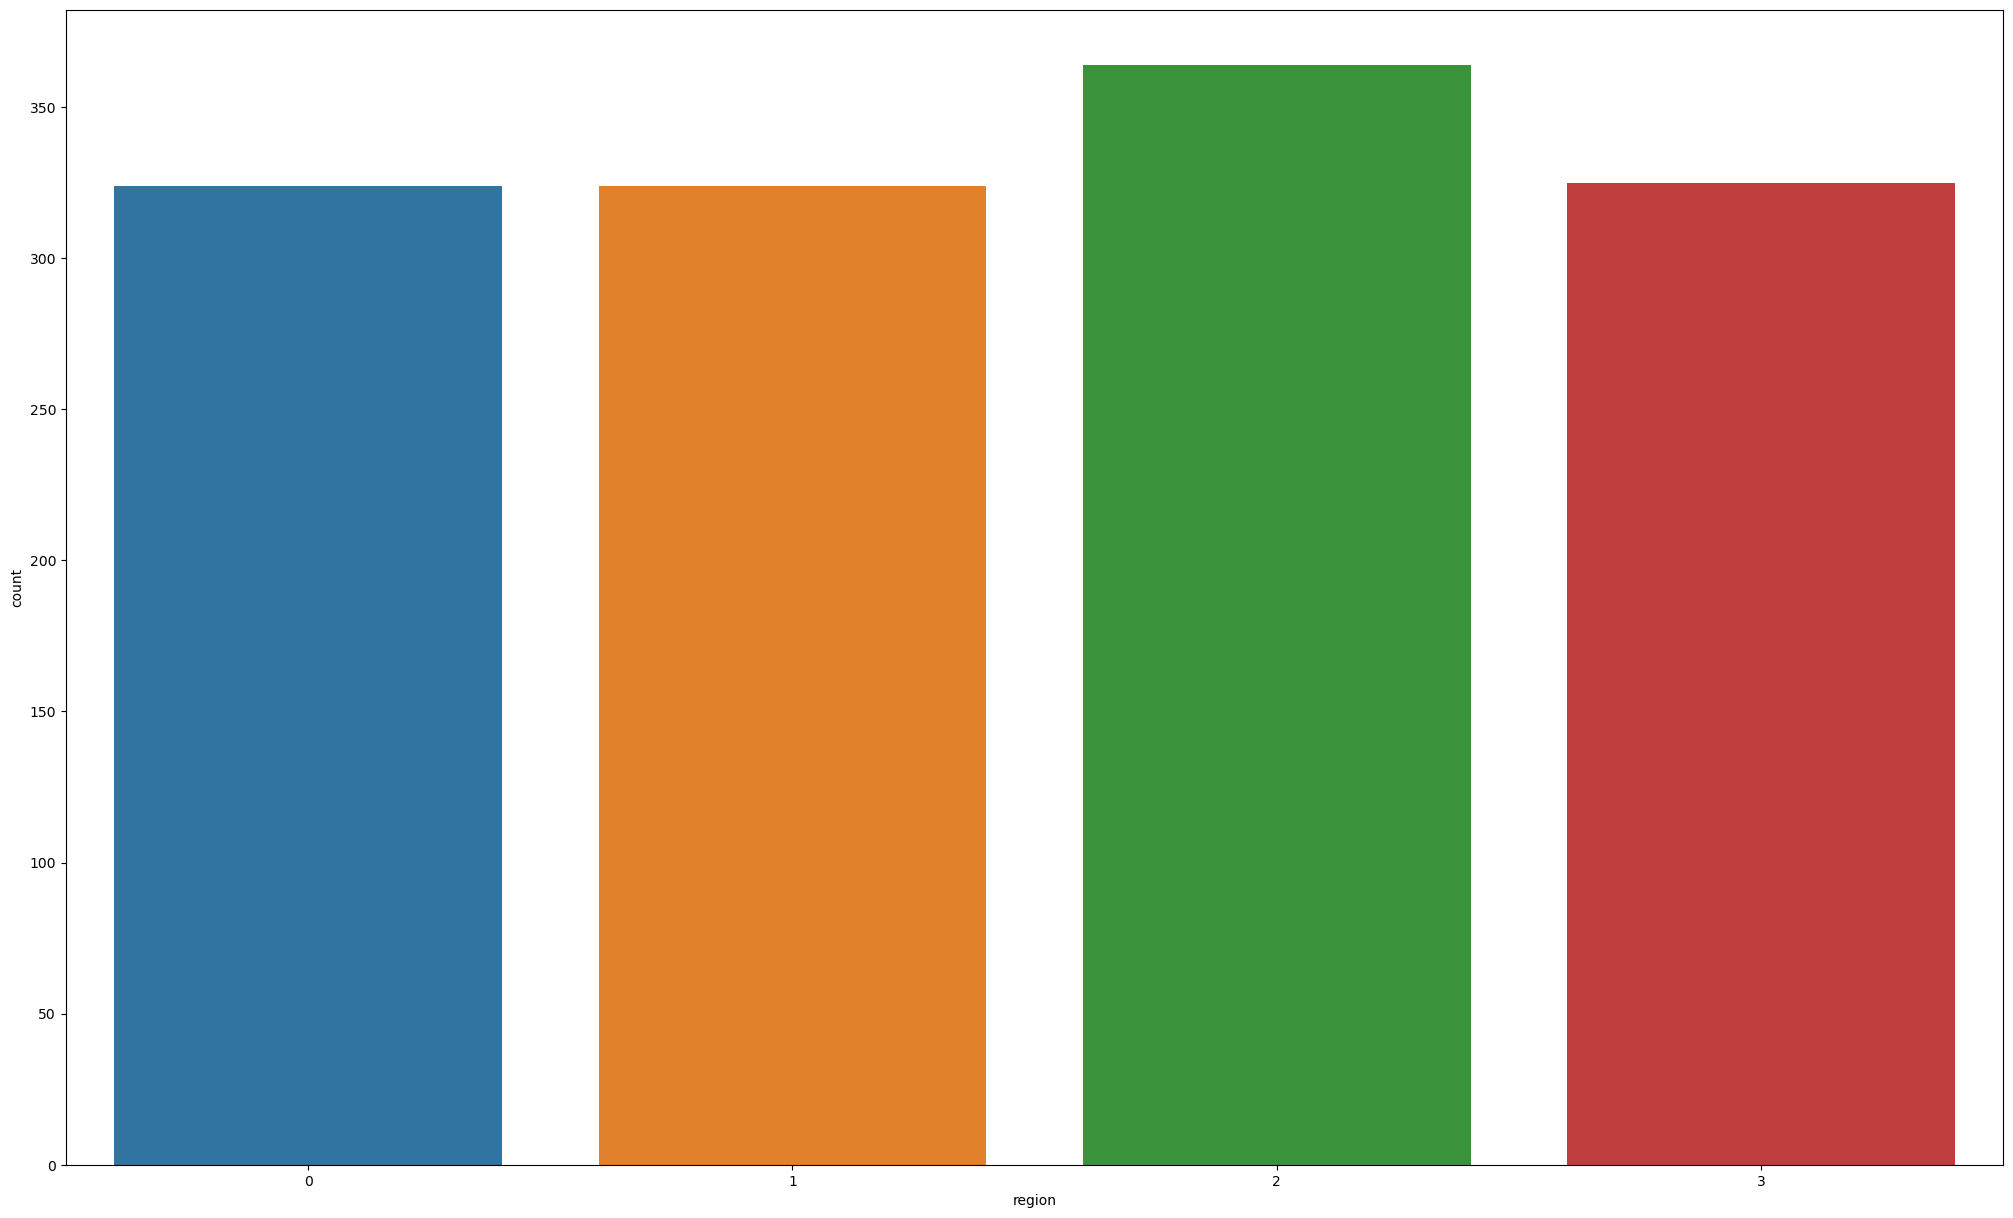

In [115]:
plt.figure(figsize=(25,15))
sns.countplot(df.region)

here we can see that people from southeast are more in numbers than other regions.

In [116]:
#Bivariate analysis-

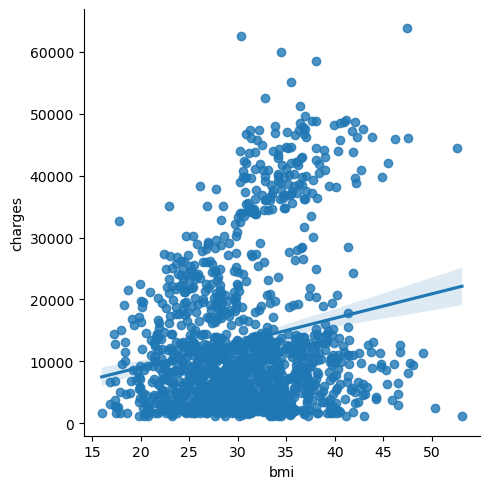

In [117]:
sns.lmplot(x='bmi',y='charges',data=df)
plt.show()

here we can see that bmi has correlationship with charges(target variable) but we cant say they have very high correlationship
between them beacuse the data is not gathered to the best fit line.

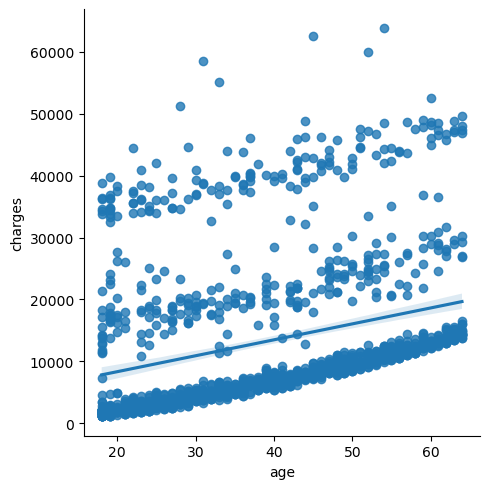

In [118]:
sns.lmplot(x='age',y='charges',data=df)
plt.show()

here we can see that age has correlationship with charges(target variable) but we cant say they have very high correlationship
between them beacuse the data is not gathered to the best fit line.

<AxesSubplot:xlabel='age', ylabel='bmi'>

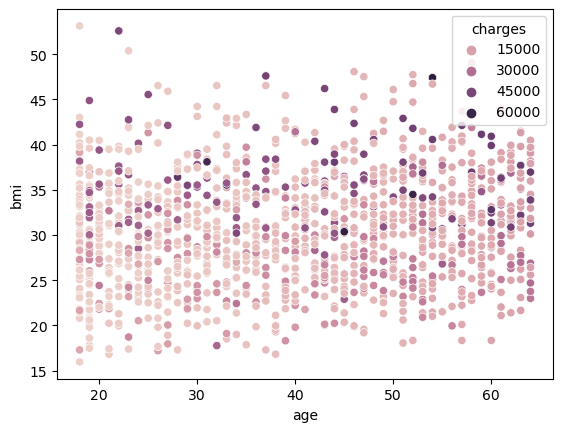

In [119]:
sns.scatterplot(x='age',y='bmi',hue='charges',data=df)

Here we can see that as the increase in the bmi the increase in the charges can be seen.
similarly as the increase in age charges also increases.

<AxesSubplot:xlabel='region', ylabel='charges'>

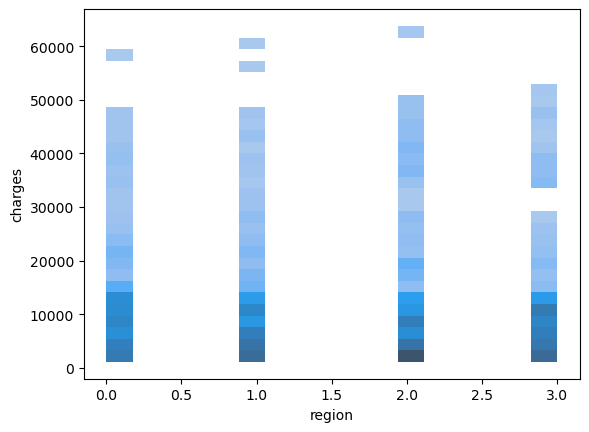

In [120]:
sns.histplot(x='region',y='charges',data=df)

i was thinking that region has no impact(only 0.6% relationship) with target variable but here i can see that for southwest column charges are low.
i dont know why so what i will do i will make 2 models one with this region column and one with by dropping this region column.

In [121]:
#Multivariate analysis-

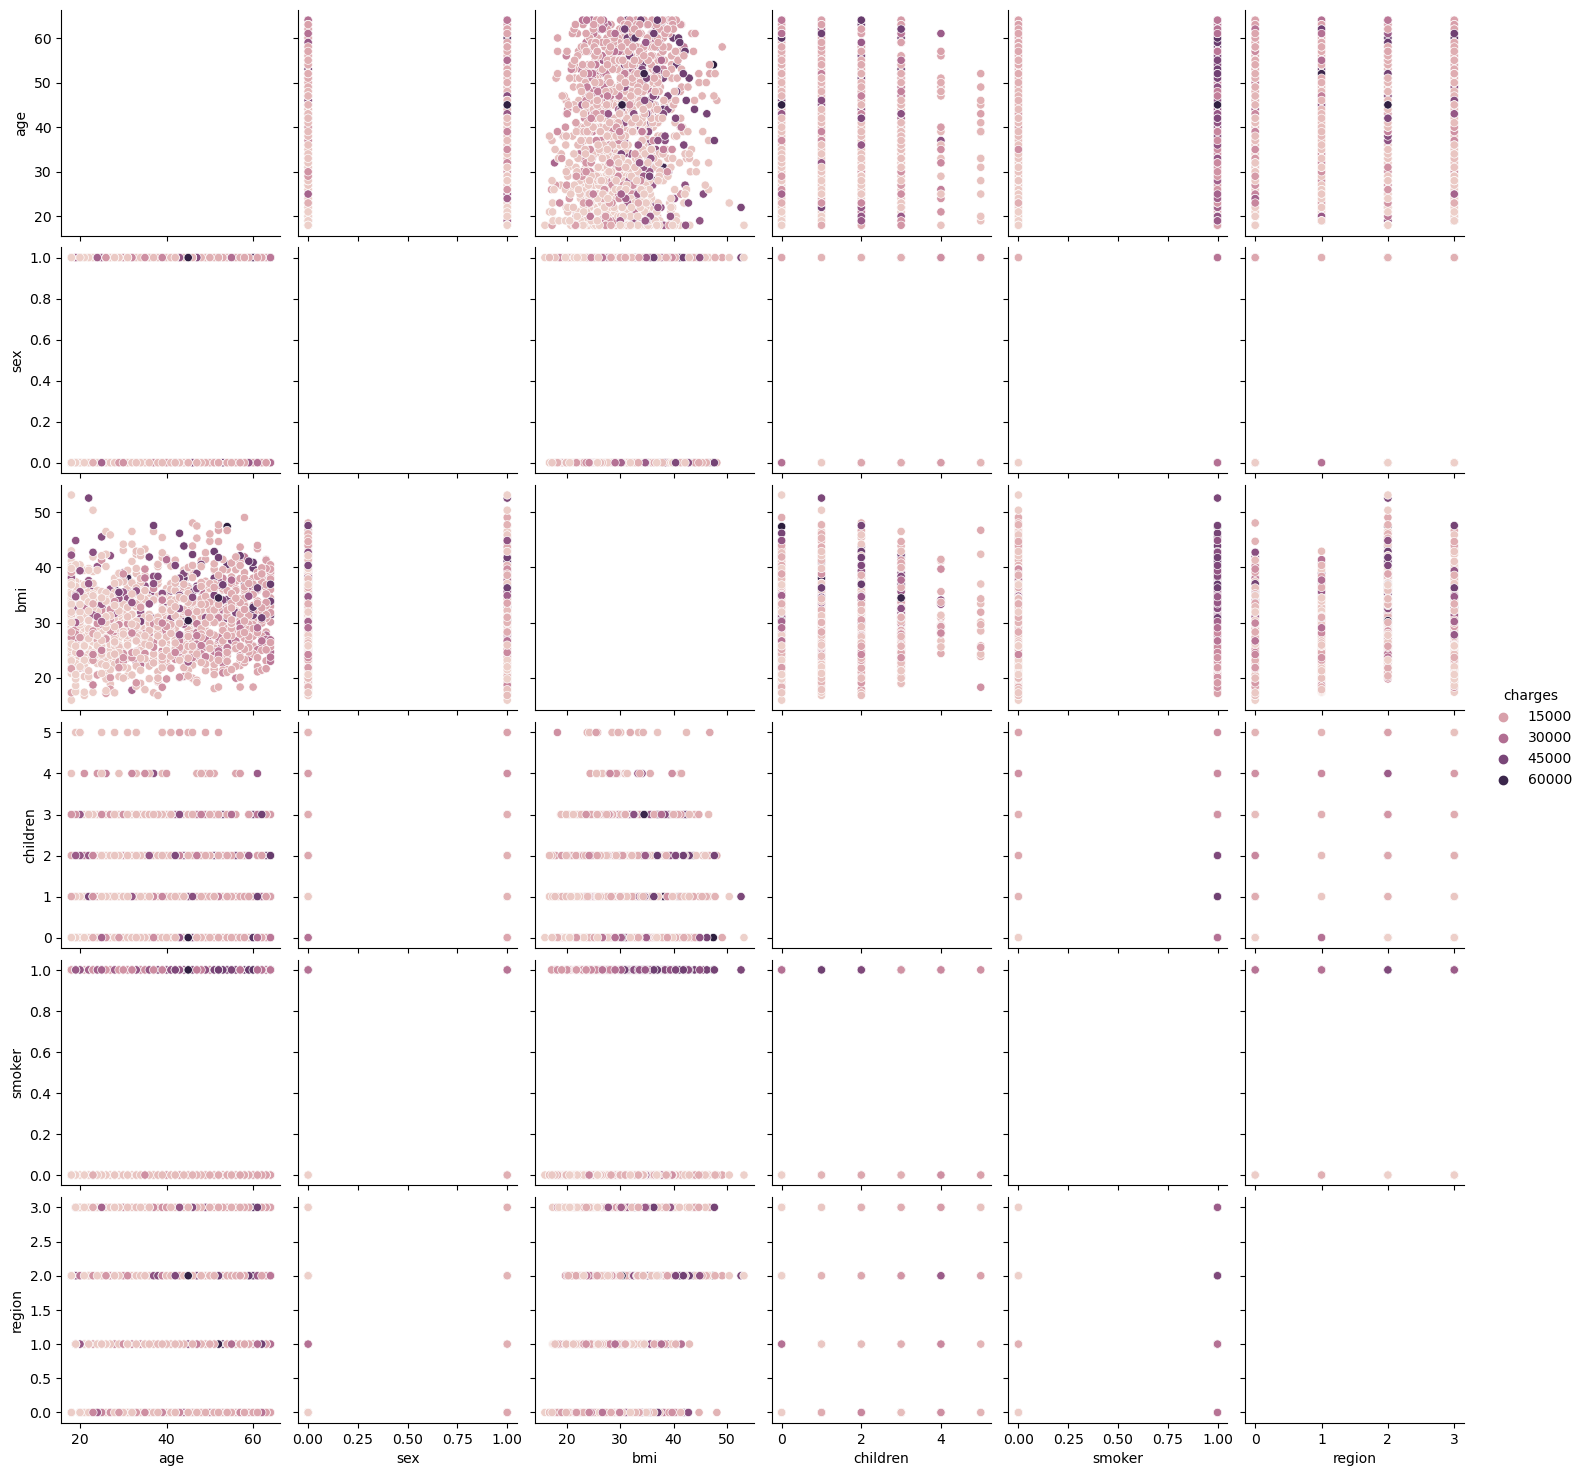

In [122]:
sns.pairplot(df,hue='charges')

Observations-

1. here we can see that bmi & age have positive correlationship with each other.
2. Age has good correlationship with target variable.
3. A very little correlationship bw sex & bmi column.
4. A very little correlationship bw sex & smoker column.
5. bmi & region column has good correlationship with each other.
6. children & age also have a little correlationship with each other.
7. Children & charges column also have little correlationship with each other.
8. smoker has correlationship with target variable.
9. region has a very little correaltionship with target variable.
10. Age has very high correlationship with target variable.
11. bmi has good correlationship with target variable.
12. smoker has very high corelationship with target variable.
13. children also have correlationship with target variable.

In [123]:
#Correlation matrix- 

In [124]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


In [125]:
#Plotting heat map-

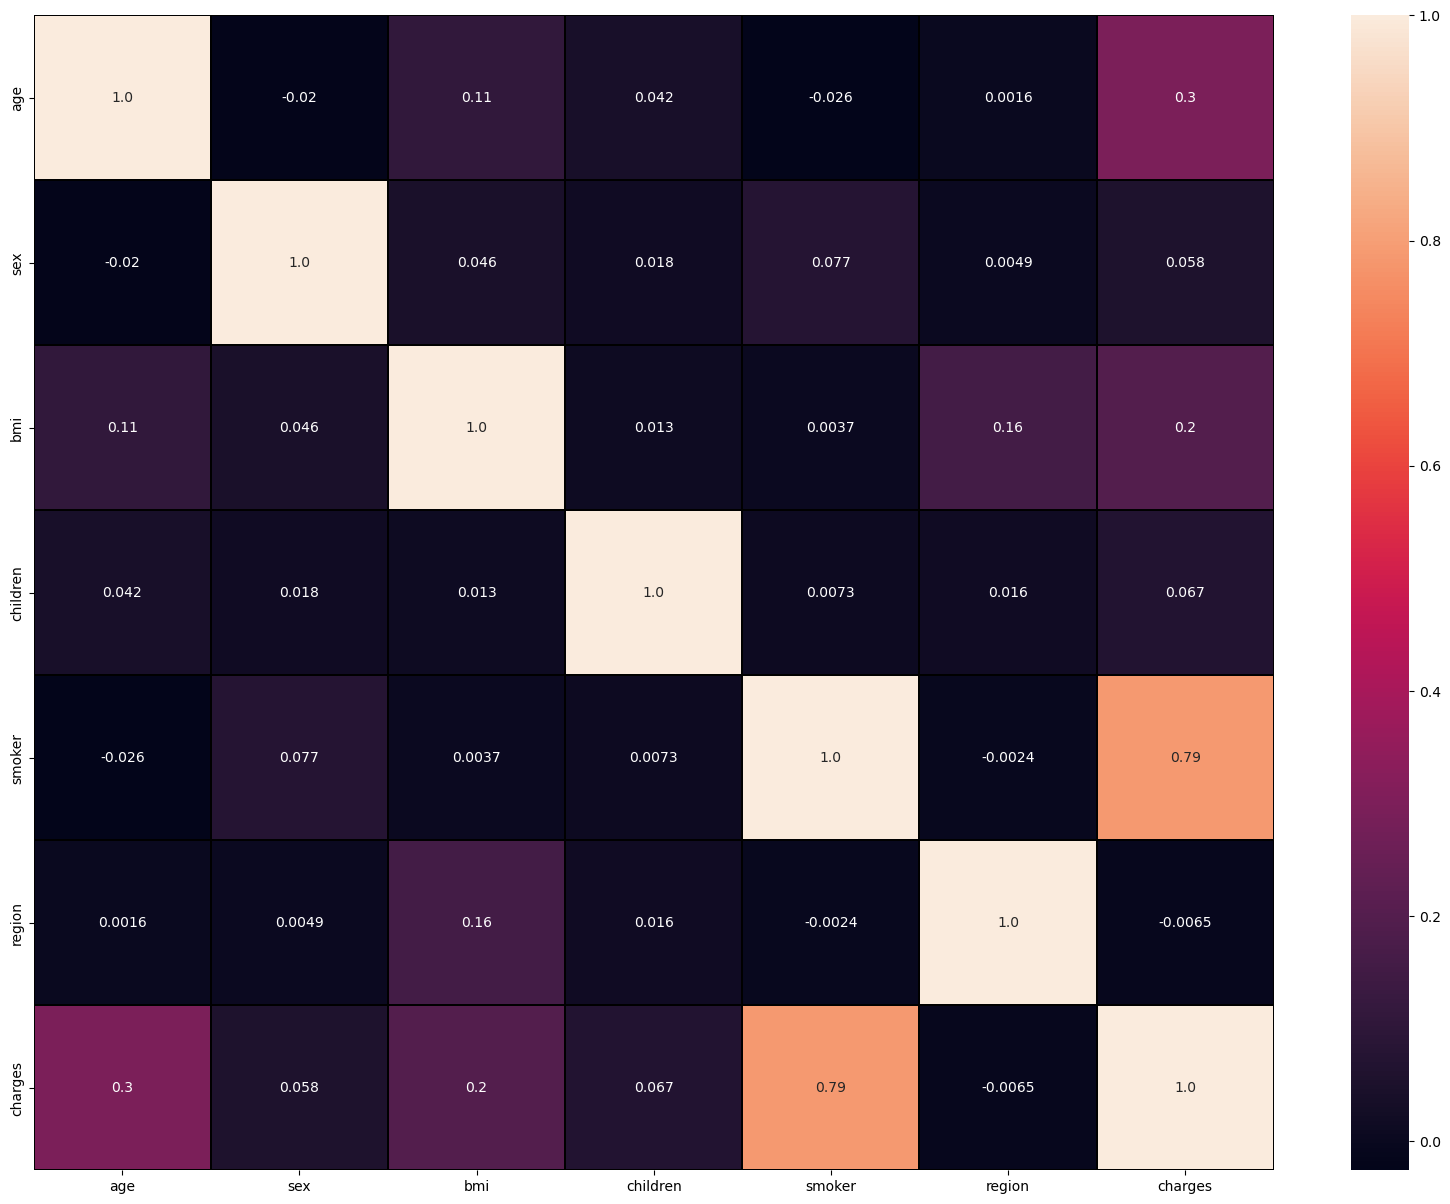

In [126]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidth='0.2',fmt='0.2')
plt.show()

Observations-

1. smoker column has the very high positive correaltionship with target variable.
2. Age column also has good positive correaltionship with target variable.
3. Region has very very little negative correlation with target variable which we can drop from our data set.
4. bmi is also positively correlated with the target variable.
5. sex and children column has very little positive correlation with target variable.
6. here one more thing we can observe that there is no multicollinearity among the features, which we will confirm with VIF.

In [127]:
#Lets check variance inflation factor for multicollinearity problem in data-

In [128]:
x=df.drop(columns=['charges'],axis=1)
y=df.charges

Here we have separated independent and dependent variable

In [129]:
#lets plot scatter plot to understand the relationship in dataset-

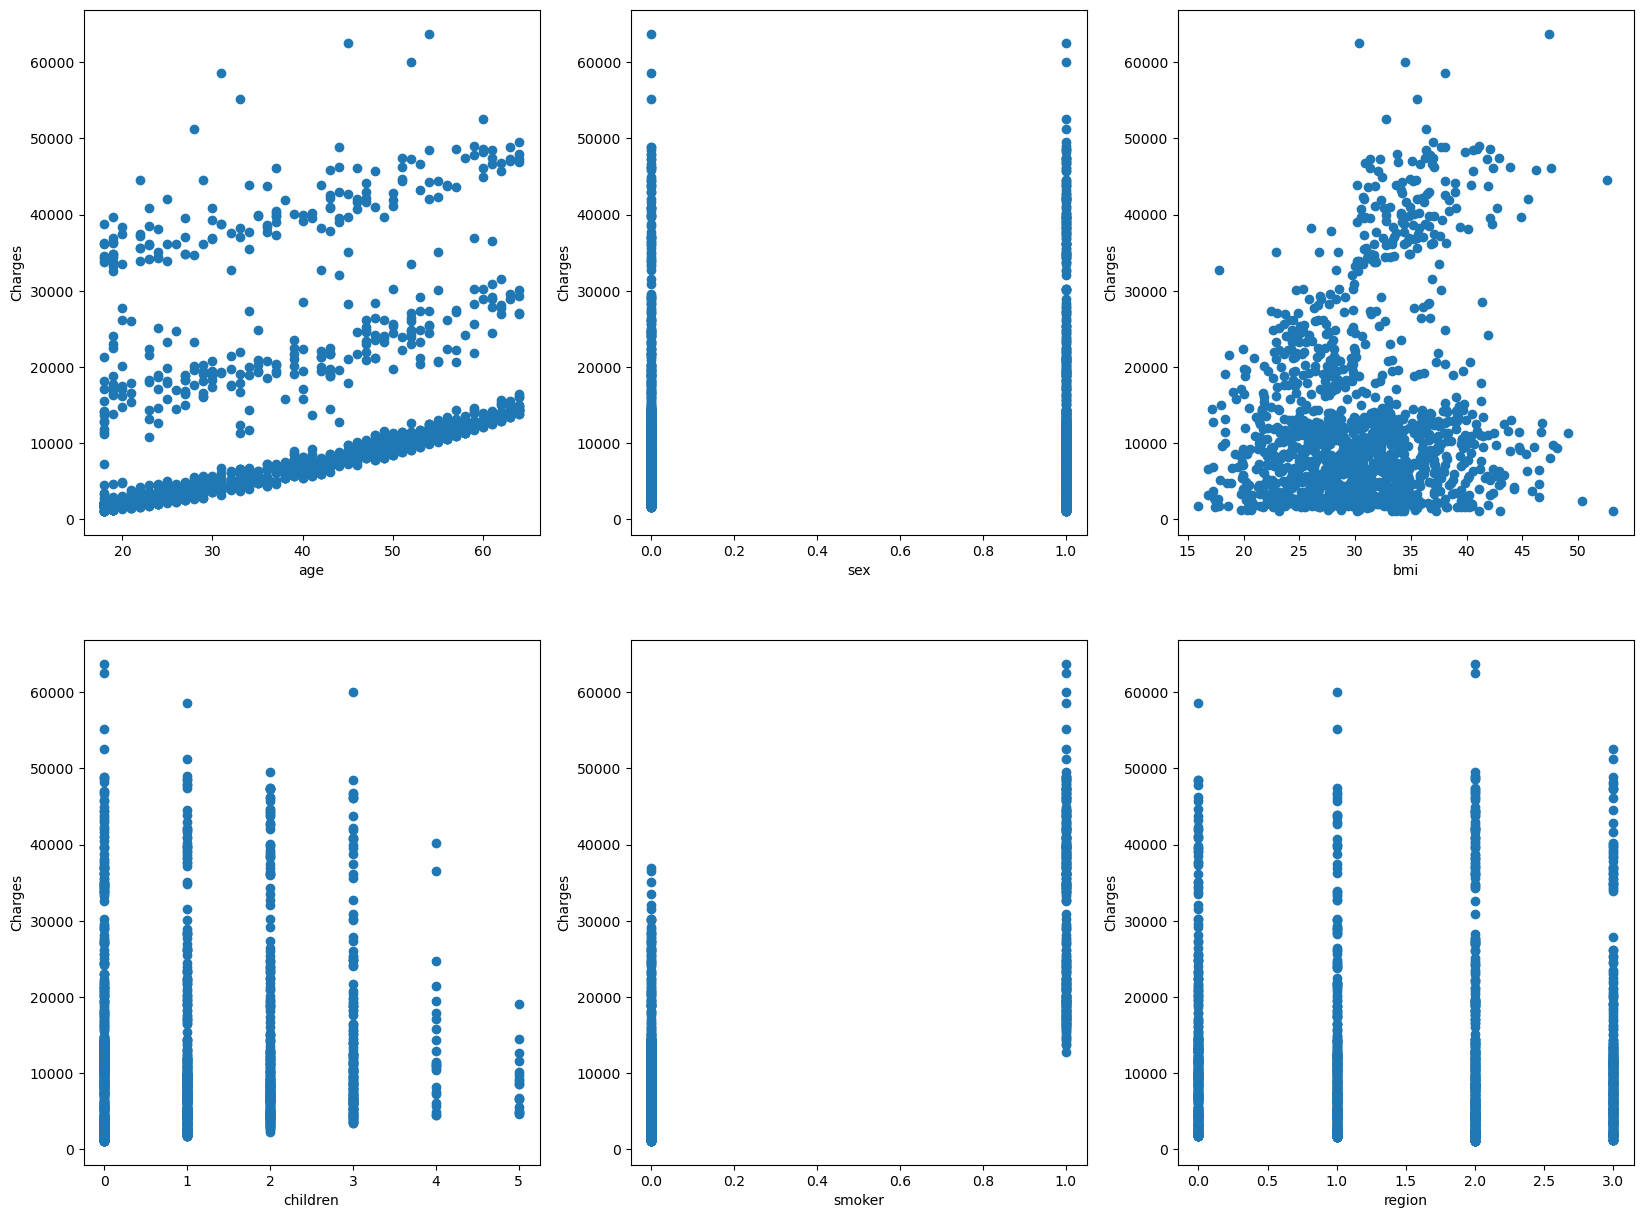

In [130]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in x:
    if plotnumber<=7:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(df[i],y)
        plt.xlabel(i)
        plt.ylabel('Charges')
    plotnumber+=1
plt.show()    

Observations-

1. here we can clearly see that age(29% correlated) & smoker(78% correlated) column has very high positive correlation with target variable. charges are high for smokers.
2. bmi(19% correlated) & children(6%) column also has positive relationship with target variable. in children column we can
see the charges are high for 0 children covered and charges are decreasing as the no of children covered increasing beacuse the
data have high quantity of 0 children covered.
as the body mass index increasing the charges also increasing.
3. here i can see there is little high charges for male than the females because the qty of male are higher than female.

In [131]:
#Lets check Distribution of data-

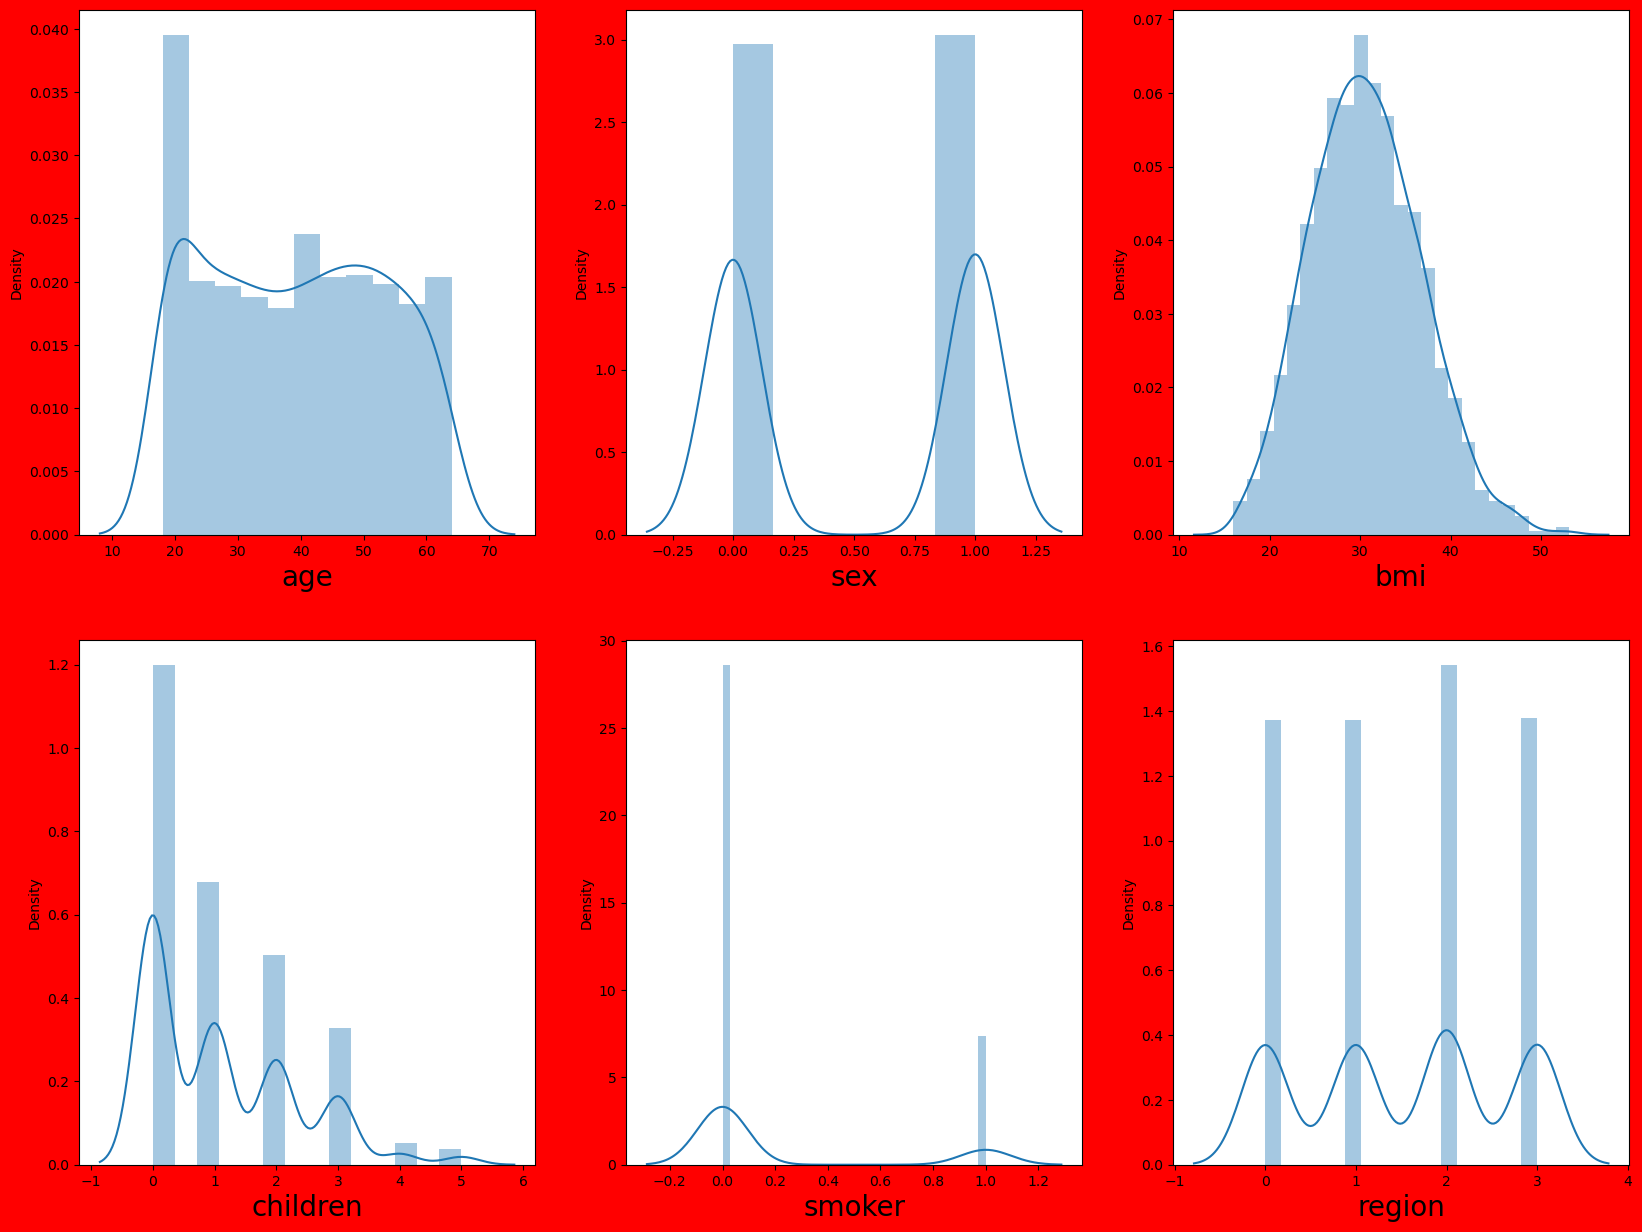

In [132]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

Observations-

1. Data in age,children & smoker column is right skewed which can be seen very clearly here.
2. Data in region & sex is little left skwed. 
3. here we can clearly see that except bmi columns no other column has symmatrically distributed data so we have to make this 
data symmatrically distributed.

In [133]:
#Lets check skewness in the data-

In [134]:
df.skew().to_frame('Skewness')

,Skewness
age,0.054781
sex,-0.019469
bmi,0.283914
children,0.937421
smoker,1.463601
region,-0.039068
charges,1.515391


Observations-

1. here we can clearly see that children column has high skewness which we need to remove.
and smoker is a categorical column so we are not worried about the skewness in that column.

In [135]:
df['children']=np.cbrt(df['children'])

In [136]:
df.skew().to_frame('Skewness')

,Skewness
age,0.054781
sex,-0.019469
bmi,0.283914
children,-0.098682
smoker,1.463601
region,-0.039068
charges,1.515391


here i have removed the skewness of children column but i have previously explored that the data is not symatrically distributed
which means data have the outliers which i will remove from the dataset.

In [137]:
#Lets check for outliers-

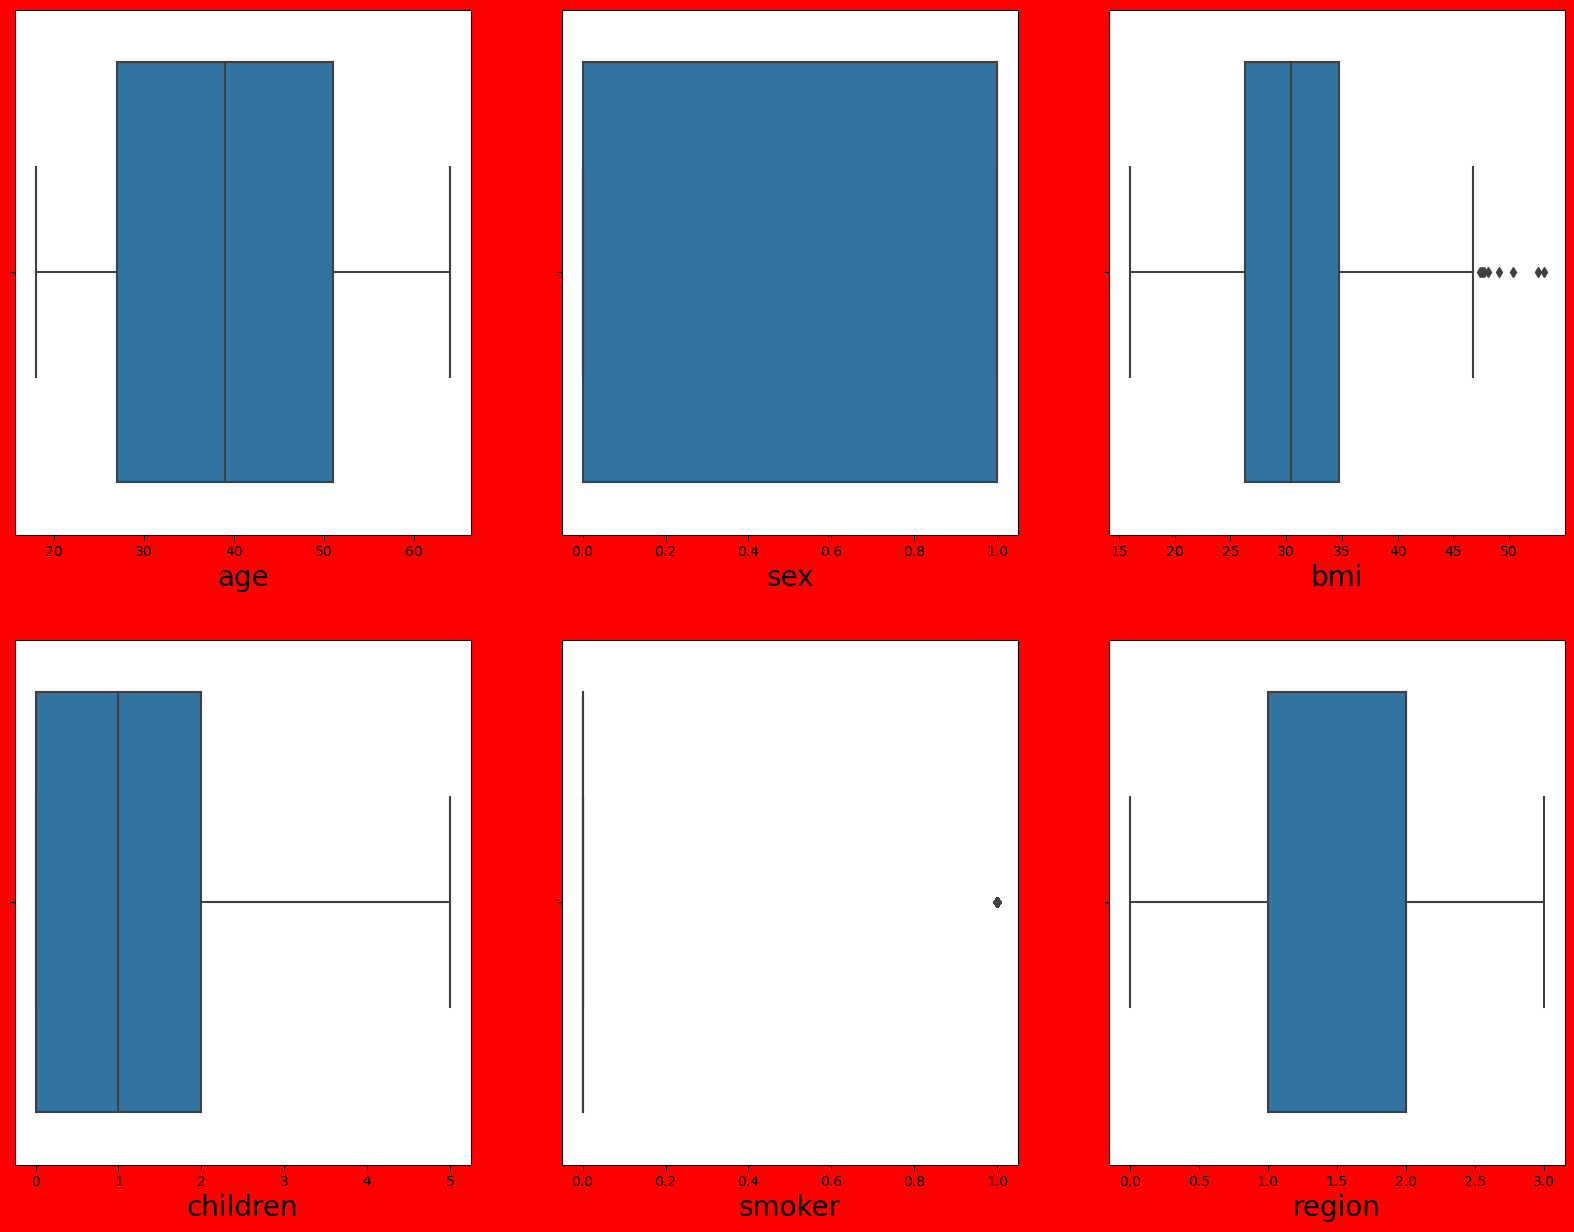

In [138]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

1. here we can see the outliers present in the bmi & smoker column has ouliers except these column no column has outliers.
2. smoker column has categorical data so we will not remove the outliers from this column.
3. we will remove outliers from bmi column.

In [139]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children   -0.098682
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

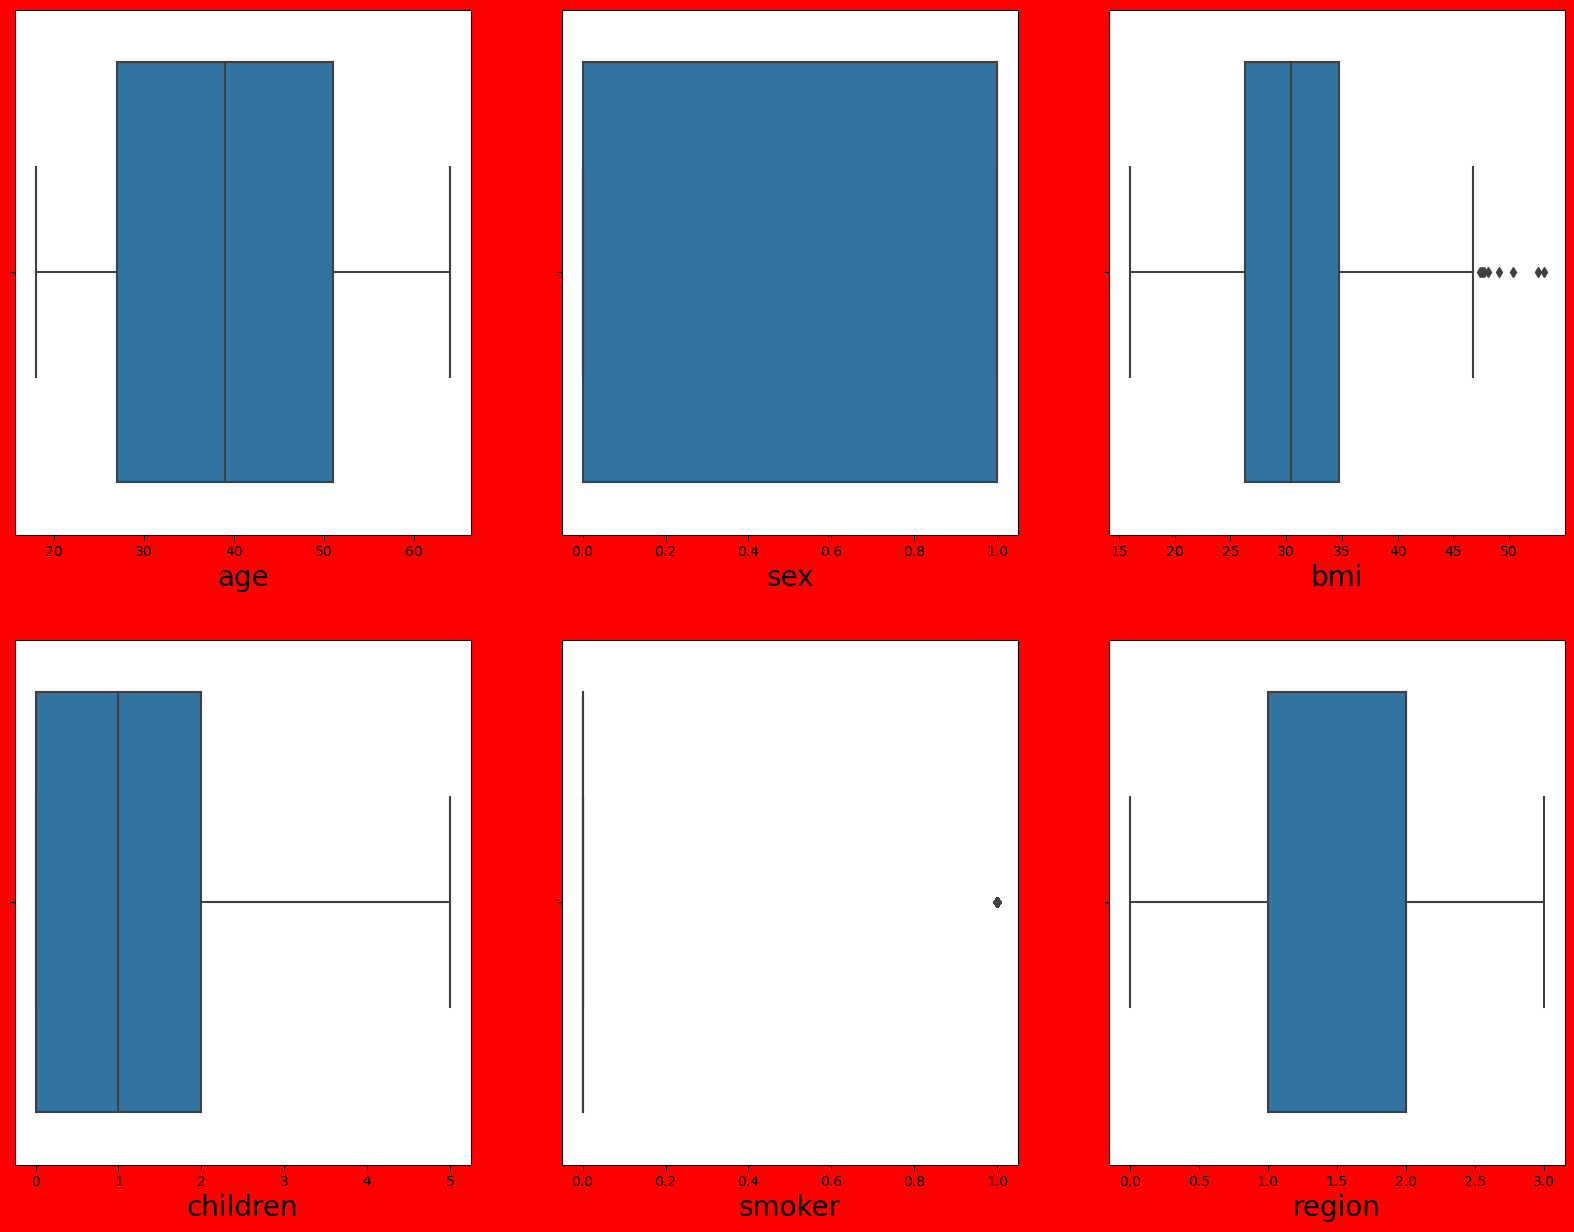

In [140]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

In [141]:
#Lets remove outliers from the dataset by IQR method-

In [142]:
df.shape

(1337, 7)

In [143]:
#upper side outliers-q3+(1.5*IQR)
#lower side outliers-q1-(1.5*IQR)


q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

In [144]:
#for bmi column-

In [145]:
bmi_high=q3.bmi+(1.5*IQR.bmi)

In [146]:
index=np.where(df['bmi']>bmi_high)
index

(array([ 116,  286,  401,  543,  846,  859, 1046, 1087, 1316], dtype=int64),)

In [147]:
df1=df.drop(df.index[index])
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1,3,16884.92400
1,18,1,33.770,1.00000,0,2,1725.55230
2,28,1,33.000,1.44225,0,2,4449.46200
3,33,1,22.705,0.00000,0,1,21984.47061
4,32,1,28.880,0.00000,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.44225,0,1,10600.54830
1334,18,0,31.920,0.00000,0,0,2205.98080
1335,18,0,36.850,0.00000,0,2,1629.83350
1336,21,0,25.800,0.00000,0,3,2007.94500


here we have removed the outliers from the dataset(bmi column) now again we will check our data distrbution in each column 
through box plot-

In [148]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1,3,16884.92400
1,18,1,33.770,1.00000,0,2,1725.55230
2,28,1,33.000,1.44225,0,2,4449.46200
3,33,1,22.705,0.00000,0,1,21984.47061
4,32,1,28.880,0.00000,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.44225,0,1,10600.54830
1334,18,0,31.920,0.00000,0,0,2205.98080
1335,18,0,36.850,0.00000,0,2,1629.83350
1336,21,0,25.800,0.00000,0,3,2007.94500


In [149]:
print('data loss:- ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss:-  0.6731488406881078


In [150]:
df1.skew().to_frame('Skewness')

,Skewness
age,0.057521
sex,-0.015078
bmi,0.157141
children,-0.096353
smoker,1.470251
region,-0.032620
charges,1.500088


Observations-

1. here we can clearly see that the data loss is only 0.67% which is in acceptable limit so now we can move further with model 
building.
2. the skewness of all column is in acceptable range so we can move further now for model building. we are not worried about the
skewness in smoker column as it contains the categorical data.

In [151]:
#after removal of outliers again i will separate my x and y variable from the dataset-

In [152]:
x=df1.drop(columns=['charges'],axis=1)
y=df1.charges

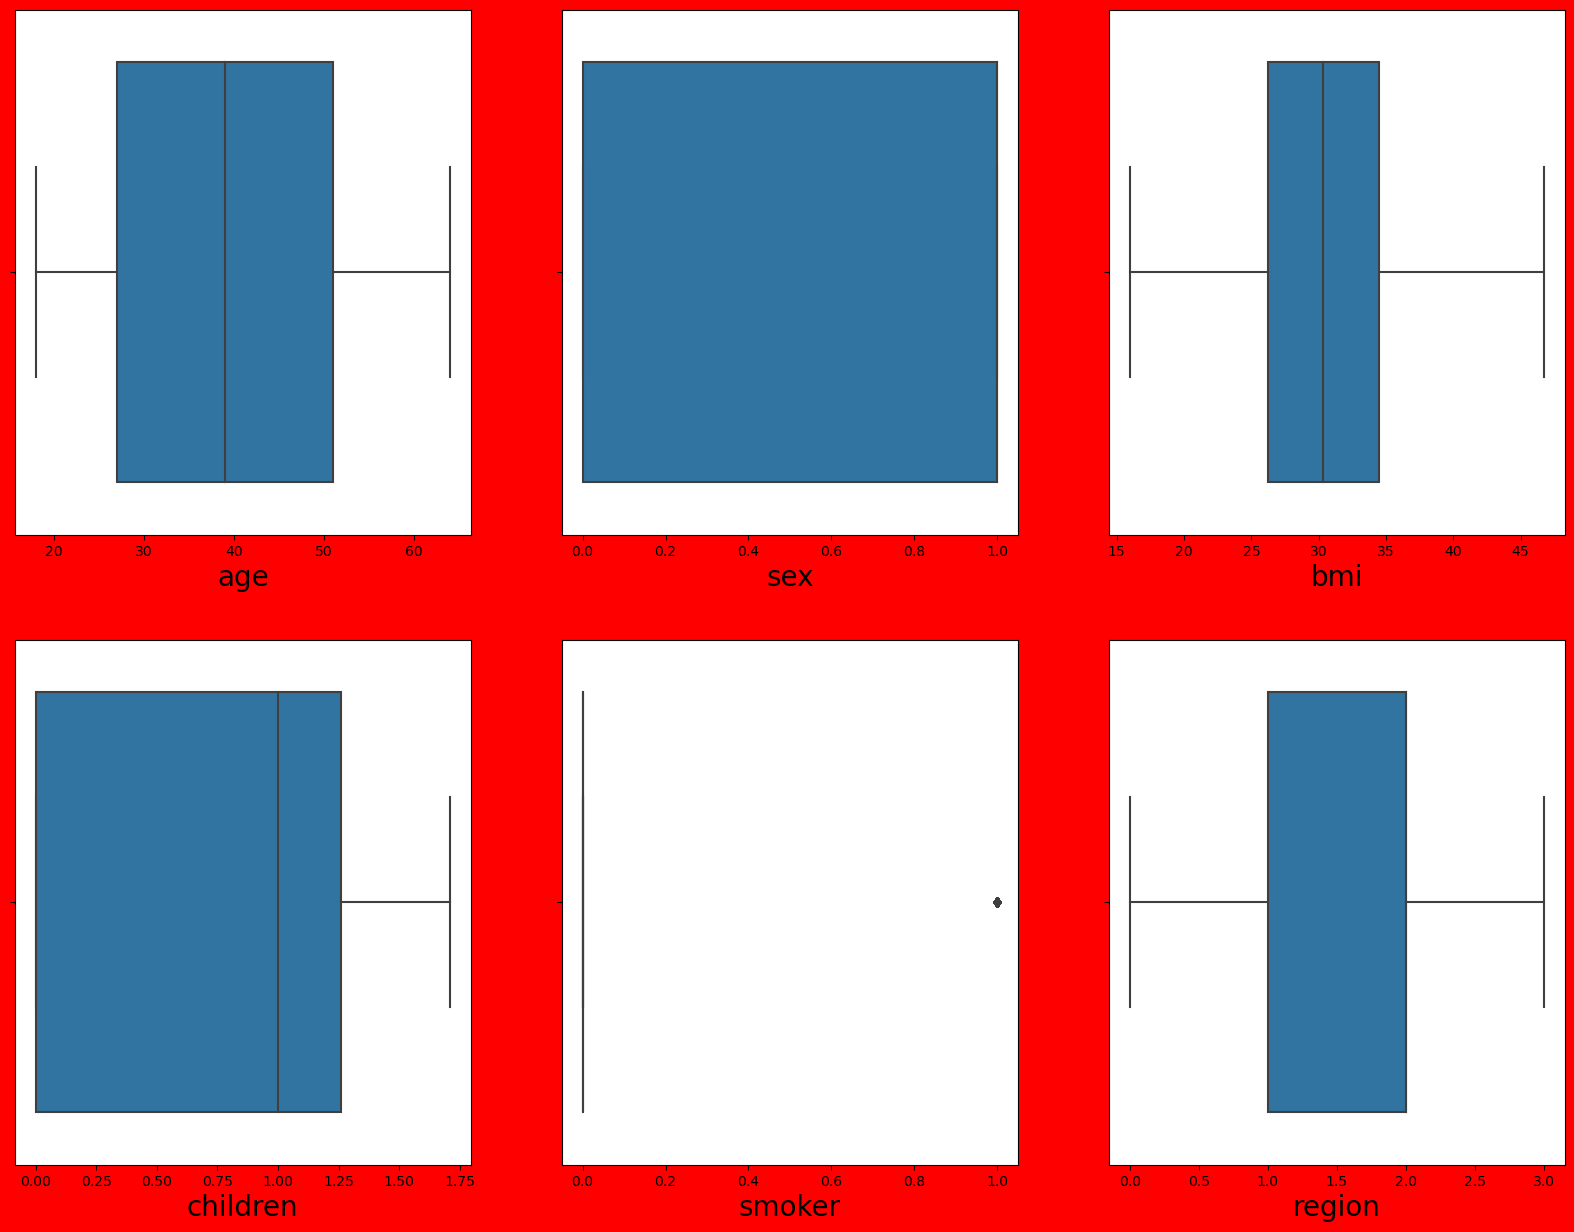

In [153]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

Now we can see that the outliers has been removed from my bmi column. smoker column consist categorical data so we are not 
worried about the outliers in this column.

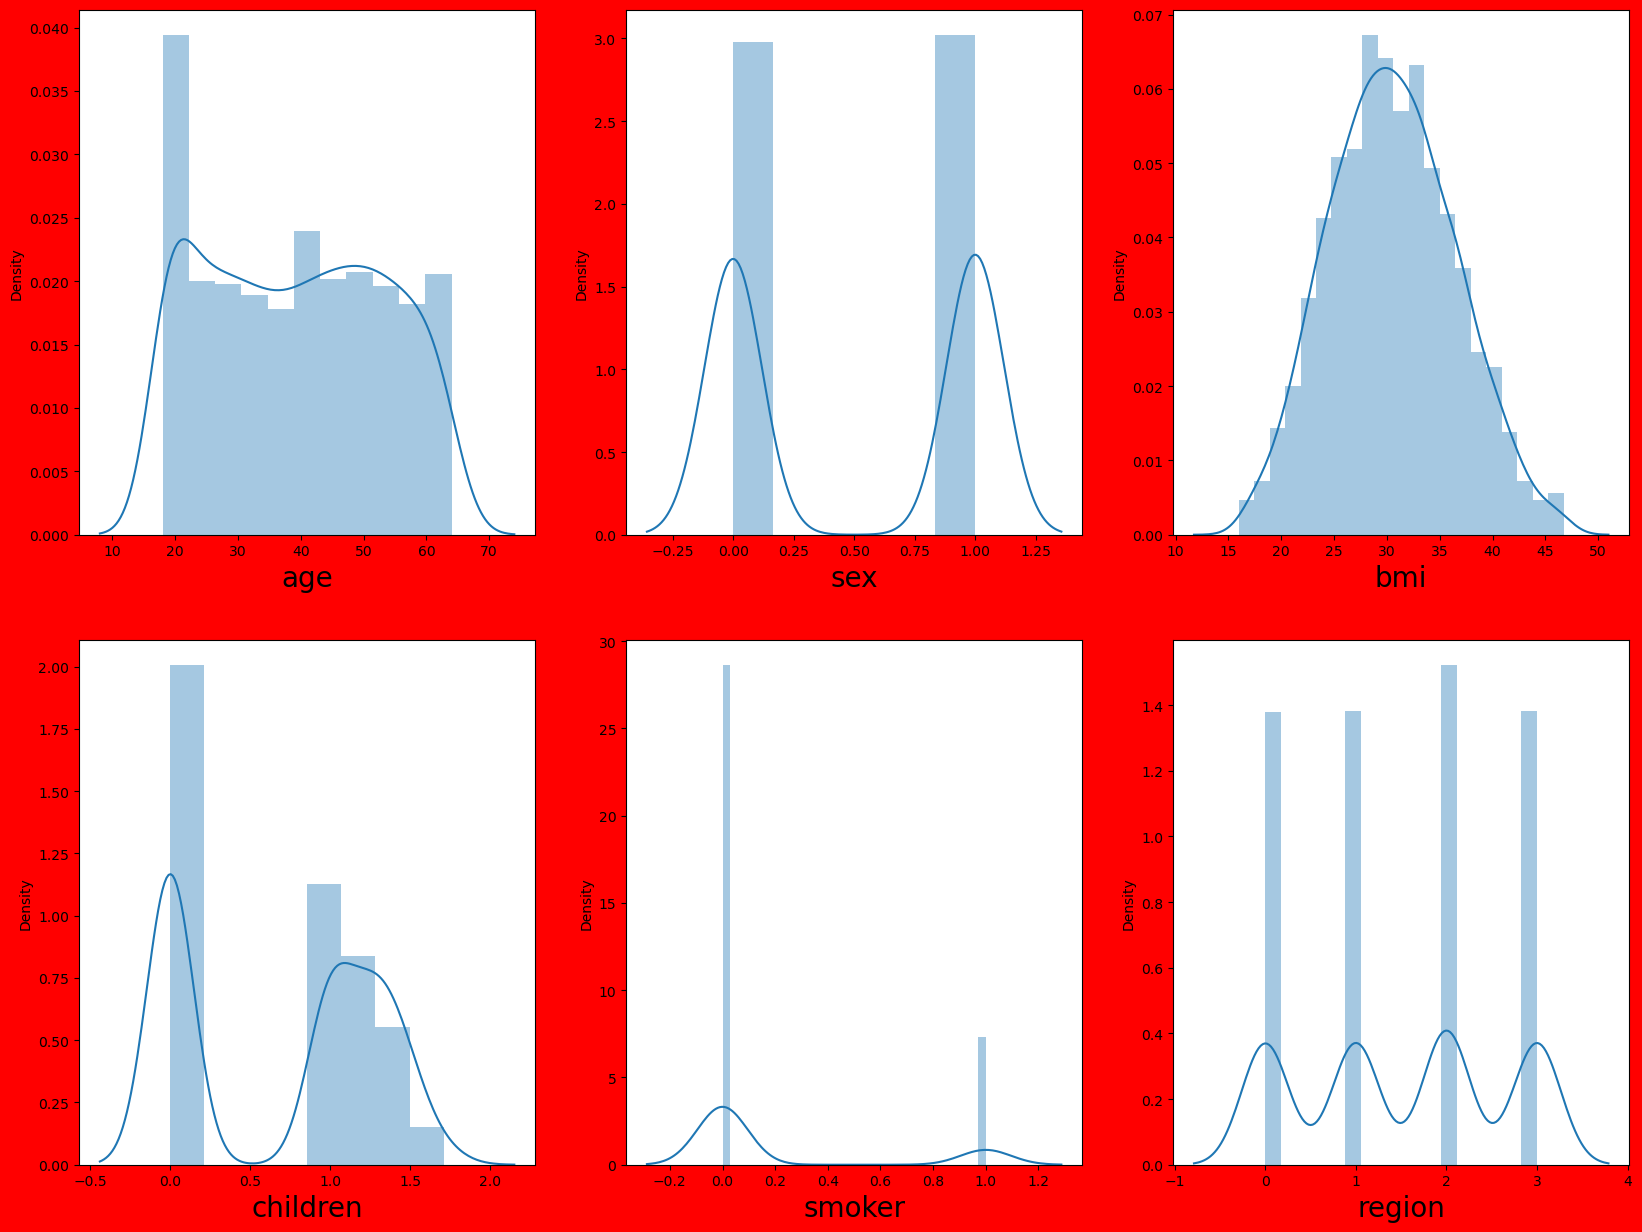

In [154]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

The skewness of all the columns is in acceptable range so now we can move further for model buolding-

In [155]:
df1.skew()

age         0.057521
sex        -0.015078
bmi         0.157141
children   -0.096353
smoker      1.470251
region     -0.032620
charges     1.500088
dtype: float64

In [156]:
#Feature scaling-

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.4404286 , -1.00755869, -0.44549526, -1.11710454,  1.97493519,
         1.34344665],
       [-1.51166949,  0.99249802,  0.5460678 ,  0.5011123 , -0.50634573,
         0.4396487 ],
       [-0.79926057,  0.99249802,  0.41599905,  1.216768  , -0.50634573,
         0.4396487 ],
       ...,
       [-1.51166949, -1.00755869,  1.06634279, -1.11710454, -0.50634573,
         0.4396487 ],
       [-1.29794681, -1.00755869, -0.80022821, -1.11710454, -0.50634573,
         1.34344665],
       [ 1.55168884, -1.00755869, -0.24785833, -1.11710454,  1.97493519,
        -0.46414925]])

we have scaled down our features using standard scaler method.

In [159]:
#Checking Variance inflation factor for multicollinearity among features-

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
vif=pd.DataFrame()

In [162]:
vif['VIF values']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [163]:
vif['features']=x.columns

In [164]:
vif

,VIF values,features
0,1.017050,age
1,1.008880,sex
2,1.040777,bmi
3,1.003138,children
4,1.007211,smoker
5,1.025361,region


so here we can see that no features has VIF values greater than 5, so all features are important as no features are correlated
with each other.

In [165]:
#lets check correlationship of features with target variable-

In [166]:
df1.corr().charges.sort_values()

region     -0.011072
sex         0.064161
children    0.073626
bmi         0.193270
age         0.301317
smoker      0.785896
charges     1.000000
Name: charges, dtype: float64

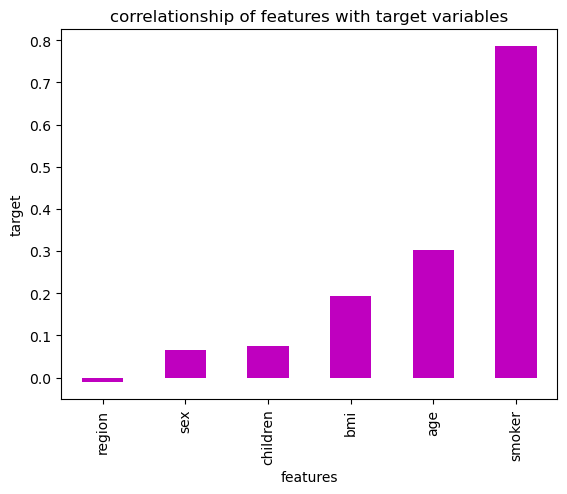

In [167]:
df1.corr().charges.sort_values().drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('features')
plt.ylabel('target')
plt.title('correlationship of features with target variables')
plt.show()

Here i can see that region has very less correlationship with target variable so i will make two models one with all the
features and one with by dropping region column.

In [168]:
#Model building with keeping all the features-

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [170]:
random_state=0
accuracy=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.24,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predict=lr.predict(x_test)
    predictt=lr.predict(x_train)
    accu=r2_score(y_test,predict)
    accuu=r2_score(y_train,predictt)
    if accu>accuracy:
            accuracy=accu
            random_state=i
print('the best accuracy is;-',accuracy, 'and best random state is:-',random_state)        

the best accuracy is;- 0.8165495857799101 and best random state is:- 574


In [171]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.24,random_state=574)

In [172]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw 
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.8165495857799101
r2_score on train data - 0.7191529676128967
mean absolute error-  3907.650694455091
mean squared error-  31844871.602344822
root mean squared error-  5643.126048773394


with Linear regression model i am getting 71.9% train accuracy and 81% test accuracy.

In [173]:
#Scatter Plot bw predicted & actual values-

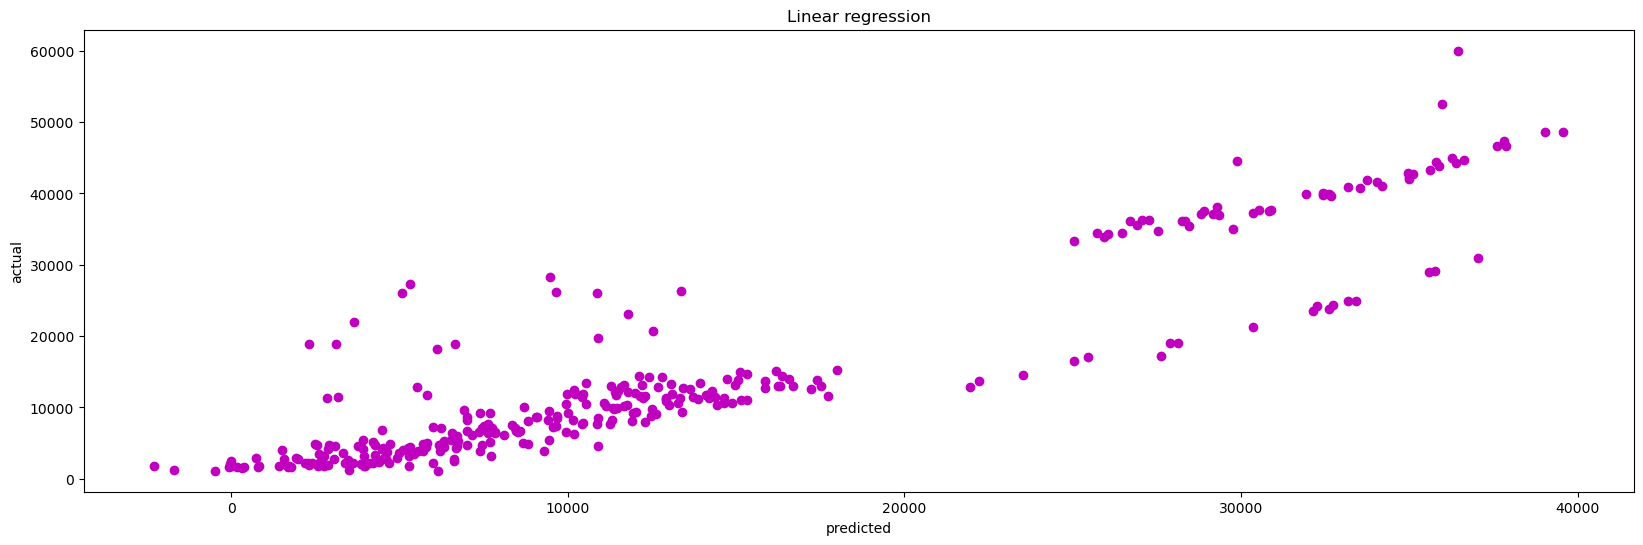

In [174]:
plt.figure(figsize=(20,6))
plt.scatter(x=predlr,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

here we can conclude that no very much similarity between actual and predicted values as the model performance is not so high.

In [175]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.887407168624835
r2_score on train data - 0.9740583938311145
mean absolute error-  2597.8074763824766
mean squared error-  19544814.187145818
root mean squared error-  4420.95172866045


with random forest model i am getting 97% train accuracy and 88.7% test accuracy.there can be overfitting issue.

In [176]:
#Scatter Plot bw predicted & actual values-

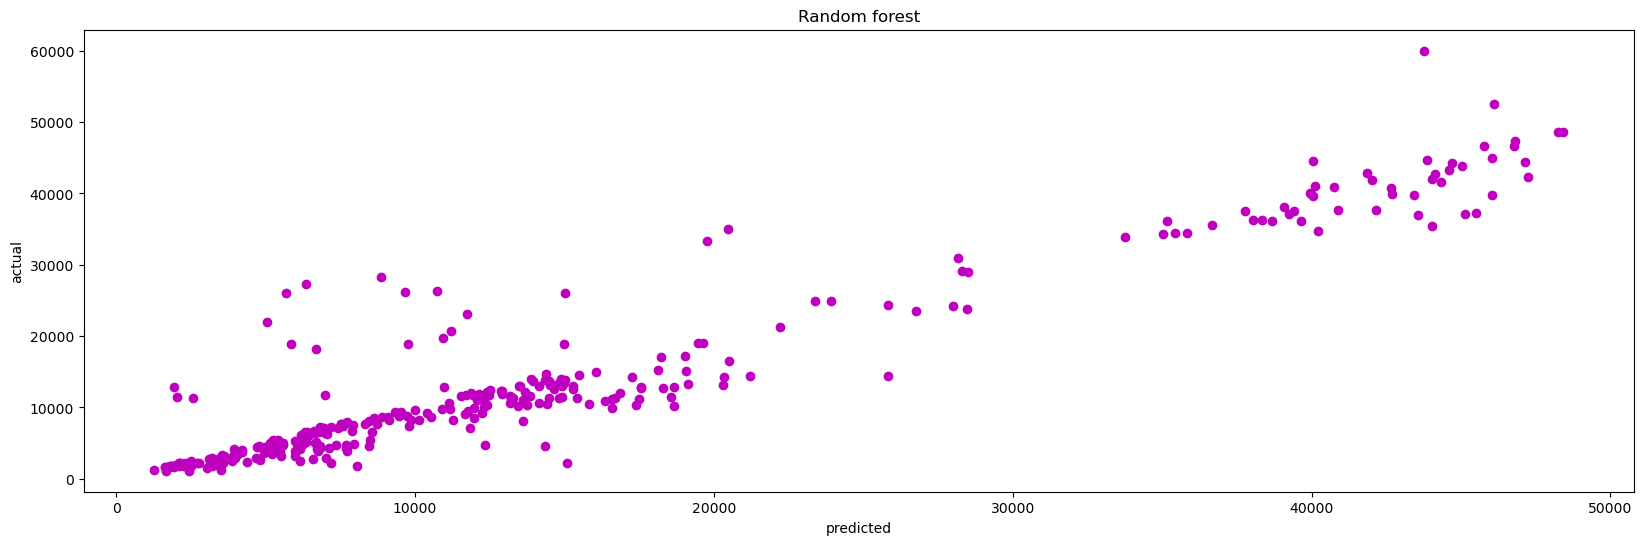

In [177]:
plt.figure(figsize=(20,6))
plt.scatter(x=predrf,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Random forest')
plt.show()

here we can conclude that good similarity between actual and predicted values as the model performance is good.

In [178]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.8615070073900626
r2_score on train data - 0.8480913526637976
mean absolute error-  3177.8930717423195
mean squared error-  24040782.82536235
root mean squared error-  4903.1400984840675


with KNN model i am getting 84% train accuracy and 86% test accuracy.

In [179]:
#Scatter Plot bw predicted & actual values-

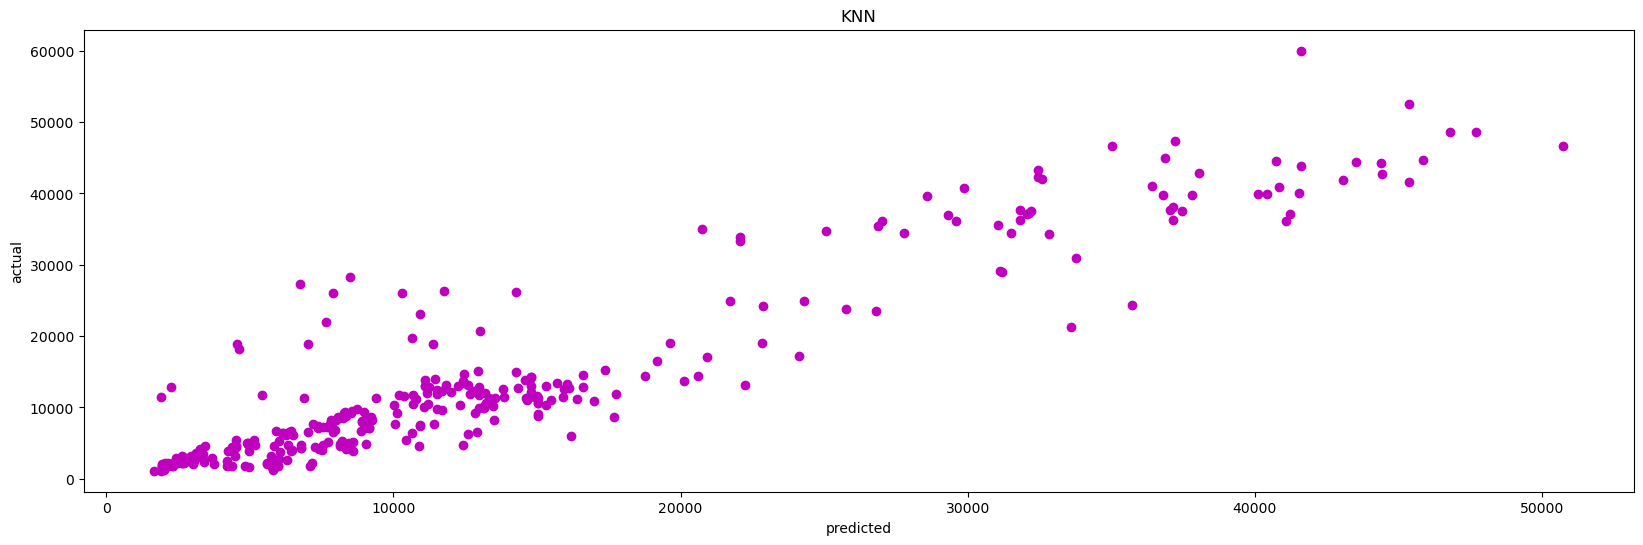

In [180]:
plt.figure(figsize=(20,6))
plt.scatter(x=predkn,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('KNN')
plt.show()

with random forest model i am getting 97% train accuracy and 84.5% test accuracy.

In [150]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.9067891037354661
r2_score on train data - 0.8888020634015482
mean absolute error-  2313.7936960712527
mean squared error-  16180334.266906803
root mean squared error-  4022.478622305755


with Gradient boosting i am getting 88% train accuracy and 90.6% test accuracy.

In [104]:
#Scatter Plot bw predicted & actual values-

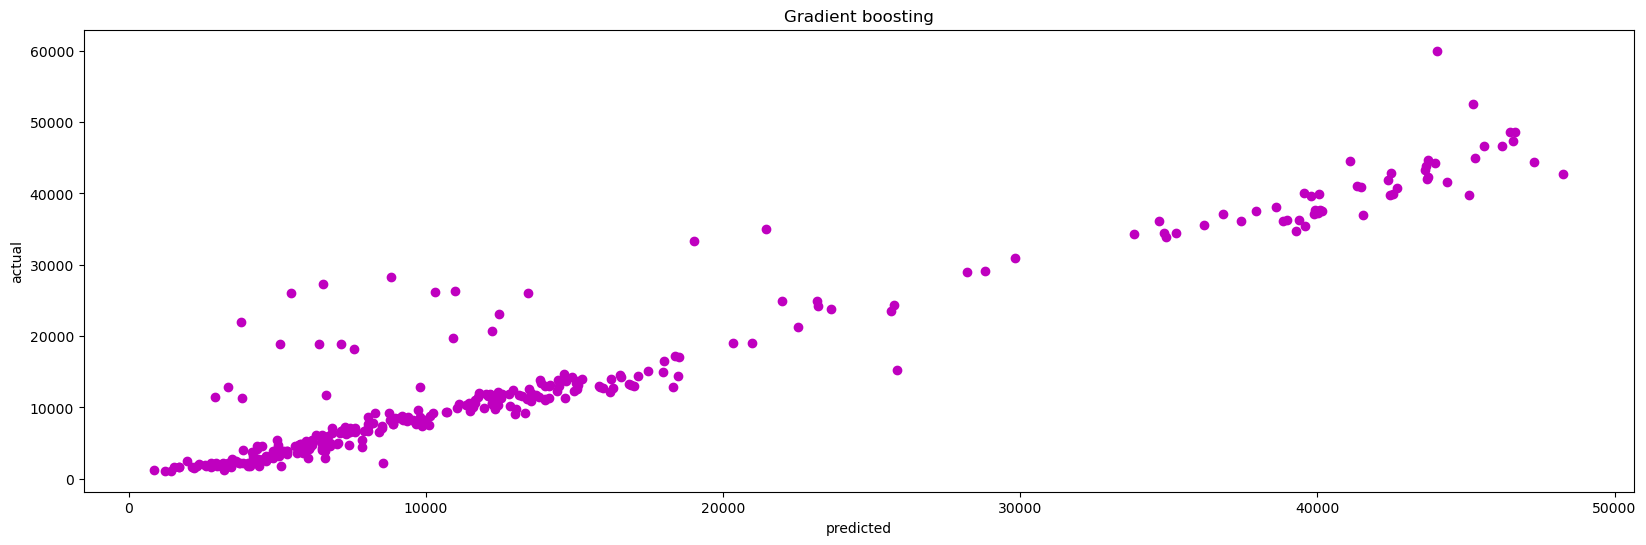

In [105]:
plt.figure(figsize=(20,6))
plt.scatter(x=predgb,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Gradient boosting')
plt.show()

In [106]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.8165329385861805
r2_score on train data - 0.7191529210101696
mean absolute error-  3907.6932000637603
mean squared error-  31847761.36276926
root mean squared error-  5643.382085484666


With lasso i am getting 71% train accuracy and 81% test accuracy.

In [107]:
#Scatter Plot bw predicted & actual values-

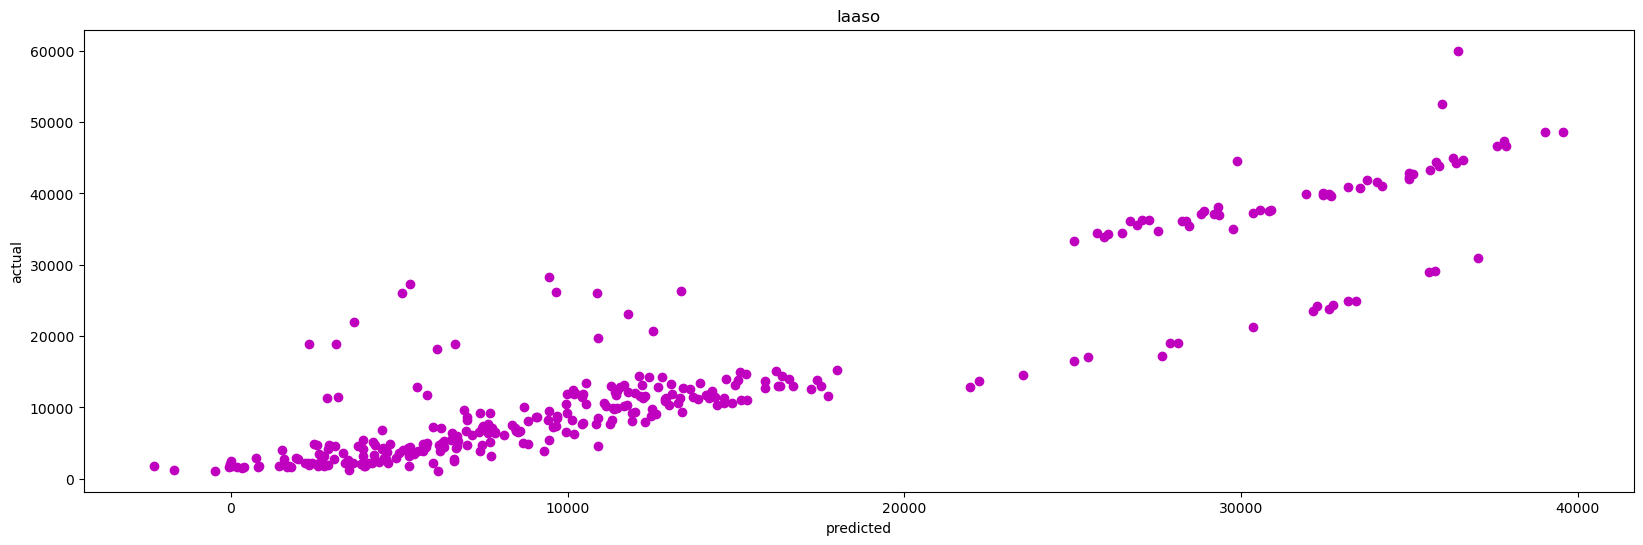

In [108]:
plt.figure(figsize=(20,6))
plt.scatter(x=predla,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('laaso')
plt.show()

In [109]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.8163727142629007
r2_score on train data - 0.7191521983410977
mean absolute error-  3910.0016107008214
mean squared error-  31875574.4534298
root mean squared error-  5645.845769539742


With Ridge i am getting 71% train accuracy and 81% test accuracy.

In [110]:
#Scatter Plot bw predicted & actual values-

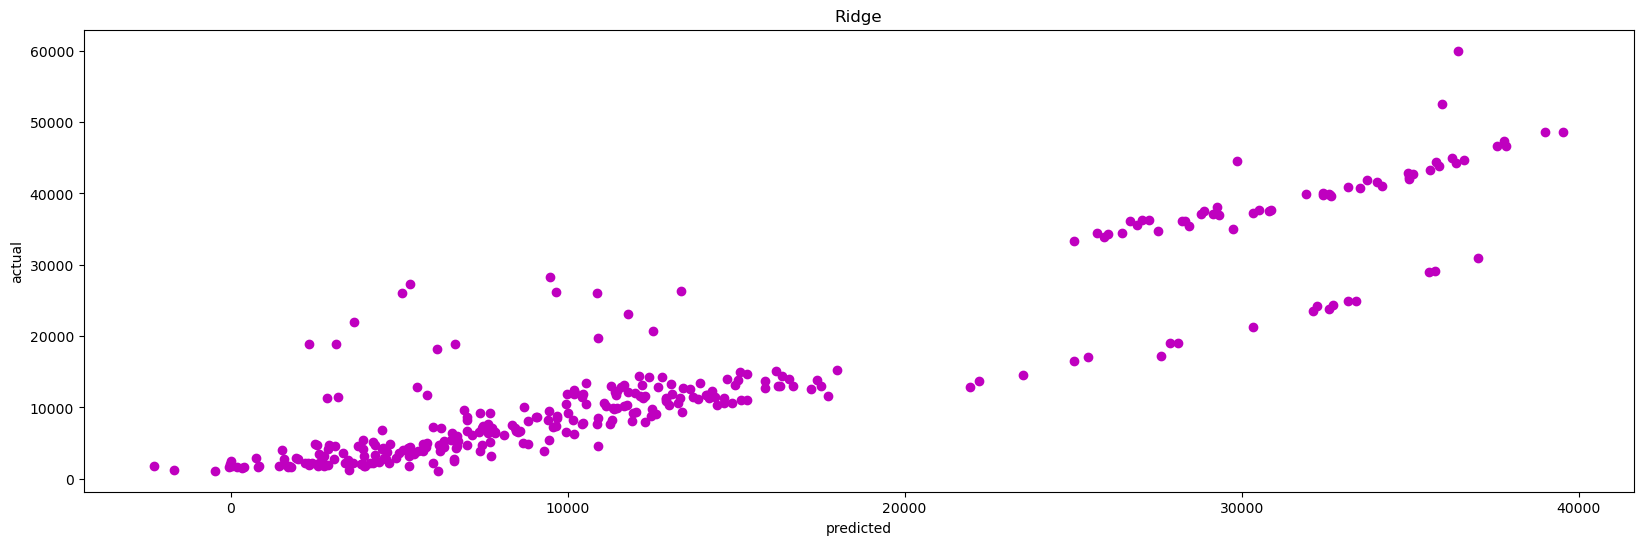

In [111]:
plt.figure(figsize=(20,6))
plt.scatter(x=predri,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Ridge')
plt.show()

here accuracy of the model is not that high as data points are not so close.

In [112]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.7319083104521534
r2_score on train data - 0.9994223607038932
mean absolute error-  3332.460337742947
mean squared error-  46537618.72166941
root mean squared error-  6821.848629343032


with decision tree regressor i am getting 99% train result and 73% test result.there may be overfitting of the model.

In [113]:
#Scatter Plot bw predicted & actual values-

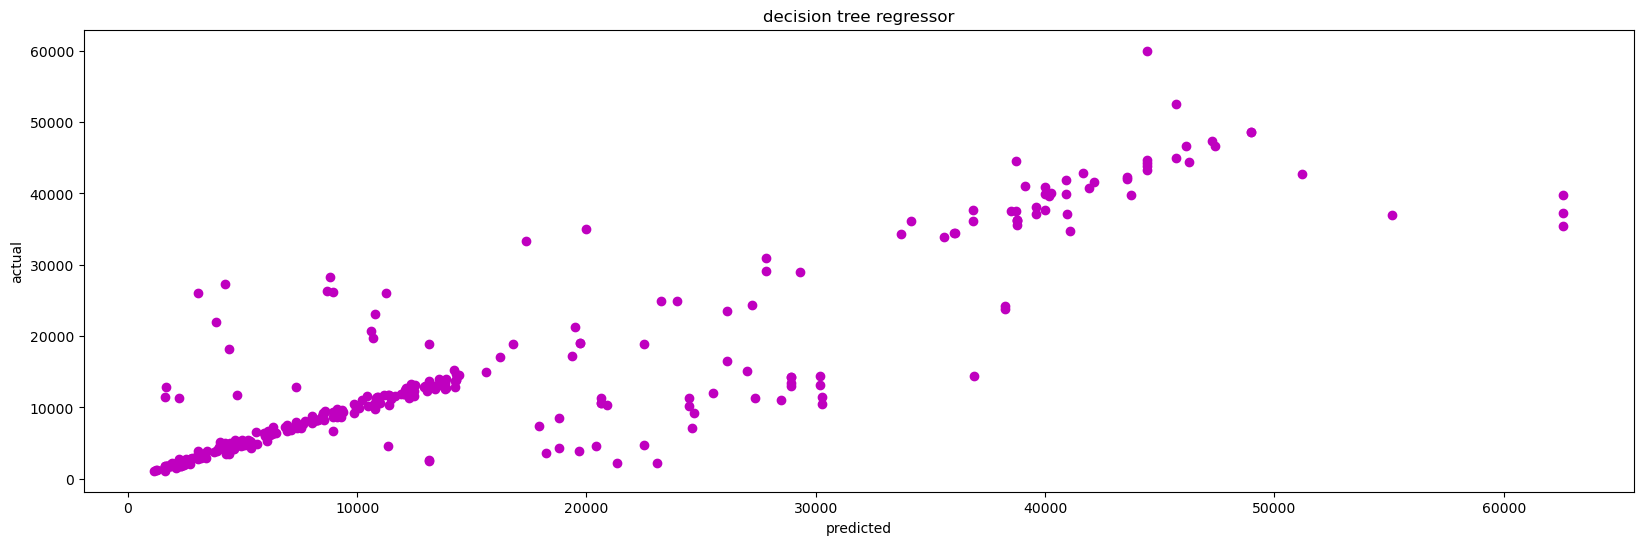

In [114]:
plt.figure(figsize=(20,6))
plt.scatter(x=preddt,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('decision tree regressor')
plt.show()

here accuracy of the model is not that high as data points are not so close.

In [255]:
from sklearn.ensemble import ExtraTreesRegressor

In [116]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.8807810967100168
r2_score on train data - 0.9994223607038932
mean absolute error-  2372.233750506333
mean squared error-  20695023.687911198
root mean squared error-  4549.178353055769


with Extra tree regressor i am getting 99.9% train result and 88% test result.there may be overfitting of the model.

In [117]:
#now we will check cross validation score-

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
#Linear regression-

In [120]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predlr)-score.mean())*100)

[0.76223604 0.71108939 0.77367217 0.72872432 0.75504363]
0.7461531116940081
difference bw r2_score and cross validation score is  7.039647408590199


so the cross val score is 74.6% for linear regression model.

In [121]:
#Random forest-

In [122]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predrf)-score1.mean())*100)

[0.85357988 0.76867656 0.86051056 0.82319321 0.85116547]
0.8314251360646105
difference bw r2_score and cross validation score is  5.616623122816744


so the cross val score is 83.2% for random forest model.

In [123]:
#KNN-

In [124]:
score2=cross_val_score(kn,x,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.19809164 0.12229399 0.05337683 0.20465606 0.18789126]
0.15326195548389387
difference bw r2_score and cross validation score is - 70.82450519061688


so the cross val score is 15% only for KNN regressor.

In [125]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.87599433 0.79289651 0.89052201 0.84554576 0.86078816]
0.8531493519263302
difference bw r2_score and cross validation score is - 5.363975180913583


so the cross val score is 85.3% for Gradient boosting regressor model.

In [126]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.76225987 0.71112339 0.7736417  0.72873366 0.75504311]
0.7461603446777569
difference bw r2_score and cross validation score is-  7.037259390842355


so the cross val score is 74.6% for lasso model.

In [127]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.76233601 0.71140426 0.77311871 0.72910557 0.75472037]
0.7461369828232026
difference bw r2_score and cross validation score is - 7.0235731439698075


so the cross val score is 74.6% for ridge model.

In [128]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.738344   0.62762746 0.72014563 0.69942263 0.68009531]
0.6931270044340401
difference bw r2_score and cross validation score is - 3.878130601811336


so the cross val score is 70.35% for decision tree regressor model.

In [129]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.83920483 0.74240931 0.84553194 0.8045639  0.84527747]
0.8153974911331392
difference bw r2_score and cross validation score is - 6.538360557687762


so the cross val score is 81.7% for extra tree regressor model.

Here i am considering Gradient boosting regressor as my best model as it is giving me train accuracy-90%, test accuracy-85.5%
and its cross val score is-85.3

In [ ]:
#hyperparameter tunning-

In [279]:
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid={'criterion':['friedman_mse','squared_error'],'random_state':[10,20,40,50,60],'max_depth':[1,10,20,40],
            'n_estimators':[50,100,200],'min_samples_leaf':[3,5,8],'min_samples_split':[2,3,4,5,6],}

In [140]:
gs=GridSearchCV(gb,param_grid,cv=5)  
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 10, 20, 40],
                         'min_samples_leaf': [3, 5, 8],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200],
                         'random_state': [10, 20, 40, 50, 60]})

In [138]:
gb.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [153]:
gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 20}

In [177]:
final_model=GradientBoostingRegressor(criterion= 'squared_error',
 max_depth= 26,
 min_samples_leaf= 16,
 min_samples_split= 22,
 n_estimators= 20,
 random_state= 13)

In [178]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('r2_score:', r2_score(y_test,pred))
print('mean absolute error- ',mean_absolute_error(y_test,pred))
print('mean squared error- ',mean_squared_error(y_test,pred))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.9019834475567288
mean absolute error-  2699.0010663955627
mean squared error-  17014540.636118397
root mean squared error-  4124.868559859623


 By hypertunning the parameter here i am getting again 90% test accuracy.

In [ ]:
#Saving my first model with 90% accuracy.

In [179]:
import pickle

In [180]:
pickle.dump(final_model,open('insurance_cost','wb'))

In [181]:
loaded_model=pickle.load(open('insurance_cost','rb'))
result=loaded_model.score(x_test,y_test)
result

0.9019834475567288

In [182]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,309,310,311,312,313,314,315,316,317,318
predicted,13655.487315,41545.24945,8383.848463,5979.51159,12314.067239,8976.960041,9224.016191,15797.199331,3067.75416,6434.903407,...,10252.027296,15183.066921,40777.70477,7547.126783,5213.143388,3447.505086,39251.879303,2617.239885,9832.059795,11040.305943
actual,11538.421000,41999.52000,5428.727700,4527.18295,12222.898300,18903.491410,4504.662400,13747.872350,1737.37600,2913.569000,...,8823.279000,11187.656700,41676.08110,6414.178000,1824.285400,2527.818650,40720.551050,1632.036250,8280.622700,19749.383380


In [ ]:
#Model no-2

#Model building by dropping the region column-

#Lets see how much difference in accuracy it may develop-

In [522]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [523]:
df1=df.drop(columns=['region'],axis=1)
df1

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


Here i have dropped the region column from the dataset.

In [524]:
x=df1.drop(columns=['charges'],axis=1)
y=df1.charges

In [525]:
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [526]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [527]:
#Feature scaling-

In [528]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039]])

In [529]:
#Model building-

In [530]:
random_state=0
accuracy=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predict=lr.predict(x_test)
    predictt=lr.predict(x_train)
    accu=r2_score(y_test,predict)
    accuu=r2_score(y_train,predictt)
    if accu>accuracy:
            accuracy=accu
            random_state=i
print('the best accuracy is;-',accuracy, 'and best random state is:-',random_state)        

the best accuracy is;- 0.8037246920883729 and best random state is:- 599


In [531]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.30,random_state=599)

In [532]:
#Linear regression-

In [533]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw 
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.8037246920883729
r2_score on train data - 0.7220893988485695
mean absolute error-  4028.298404912518
mean squared error-  31369549.124741852
root mean squared error-  5600.85253552902


In [534]:
#ScatterPlot bw predicted & actual values-

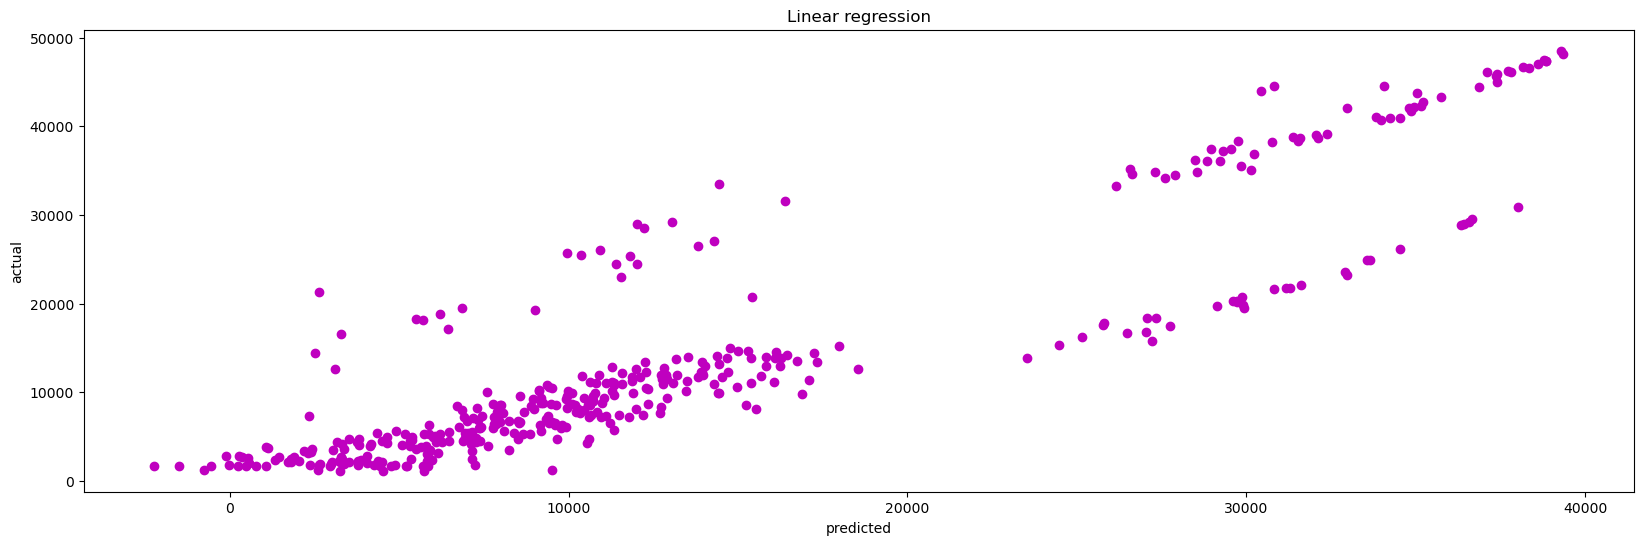

In [535]:
plt.figure(figsize=(20,6))
plt.scatter(x=predlr,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Linear regression')
plt.show()

In [536]:
#Random forest-

In [537]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.8670588621494738
r2_score on train data - 0.9738773697103276
mean absolute error-  2584.94903458806
mean squared error-  21247214.42994164
root mean squared error-  4609.470081250299


In [538]:
#ScatterPlot bw predicted & actual values-

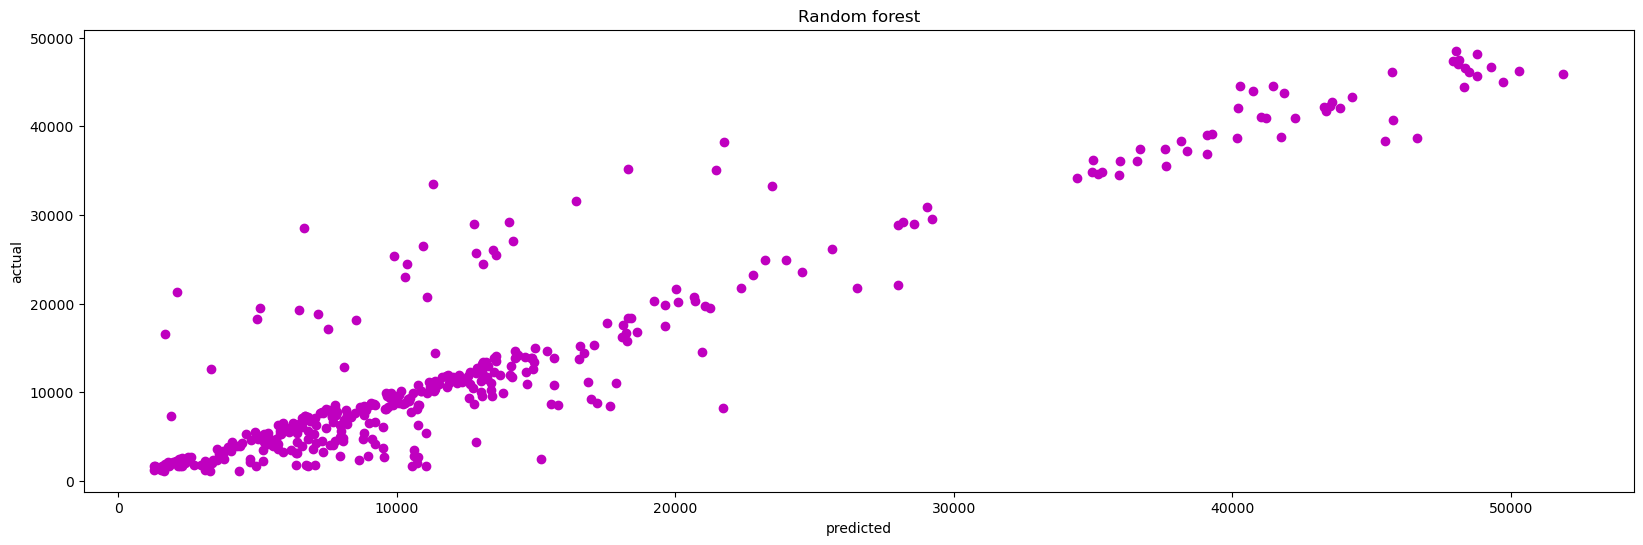

In [539]:
plt.figure(figsize=(20,6))
plt.scatter(x=predrf,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Random forest')
plt.show()

In [540]:
#KNN Model-

In [541]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.8405406937957285
r2_score on train data - 0.8660062017319731
mean absolute error-  3020.8276720174126
mean squared error-  25485460.155917183
root mean squared error-  5048.312604813334


In [542]:
#ScatterPlot bw predicted & actual values-

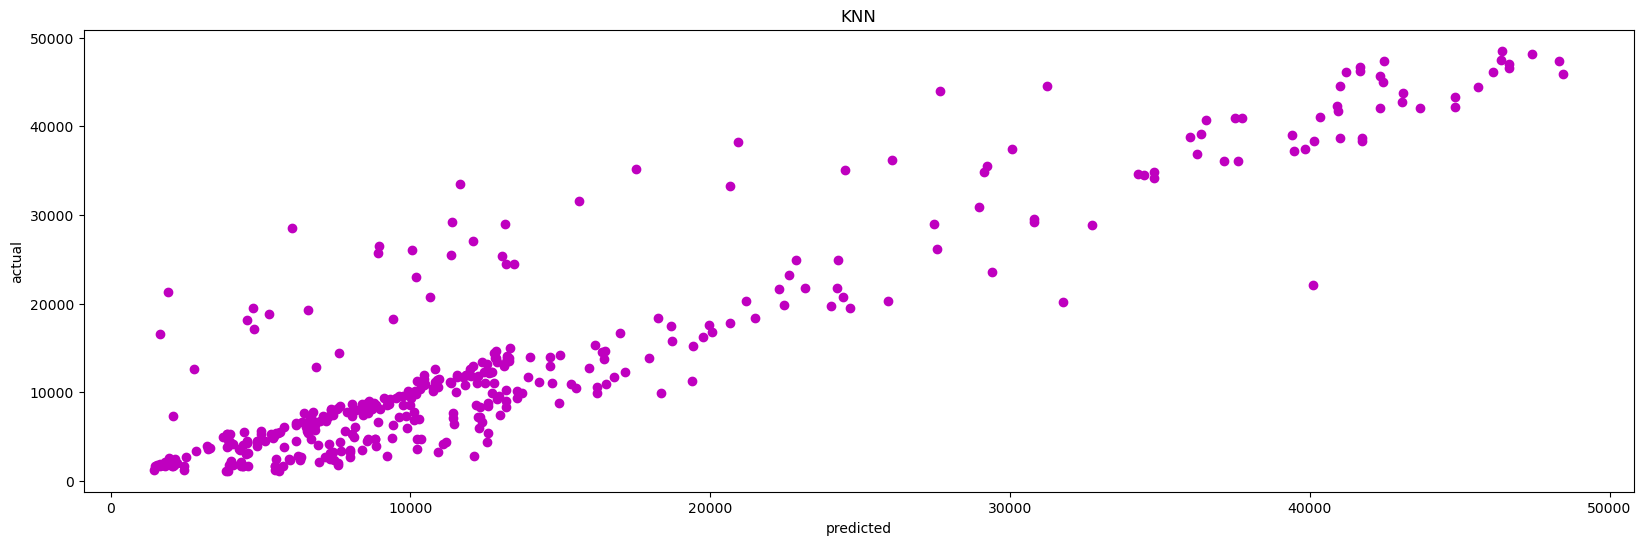

In [543]:
plt.figure(figsize=(20,6))
plt.scatter(x=predkn,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('KNN')
plt.show()

In [544]:
#Gradient boosting regressor-

In [545]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8850442427969882
r2_score on train data - 0.893009705849247
mean absolute error-  2423.69405499637
mean squared error-  18372714.892774116
root mean squared error-  4286.340501263767


In [546]:
#ScatterPlot bw predicted & actual values-

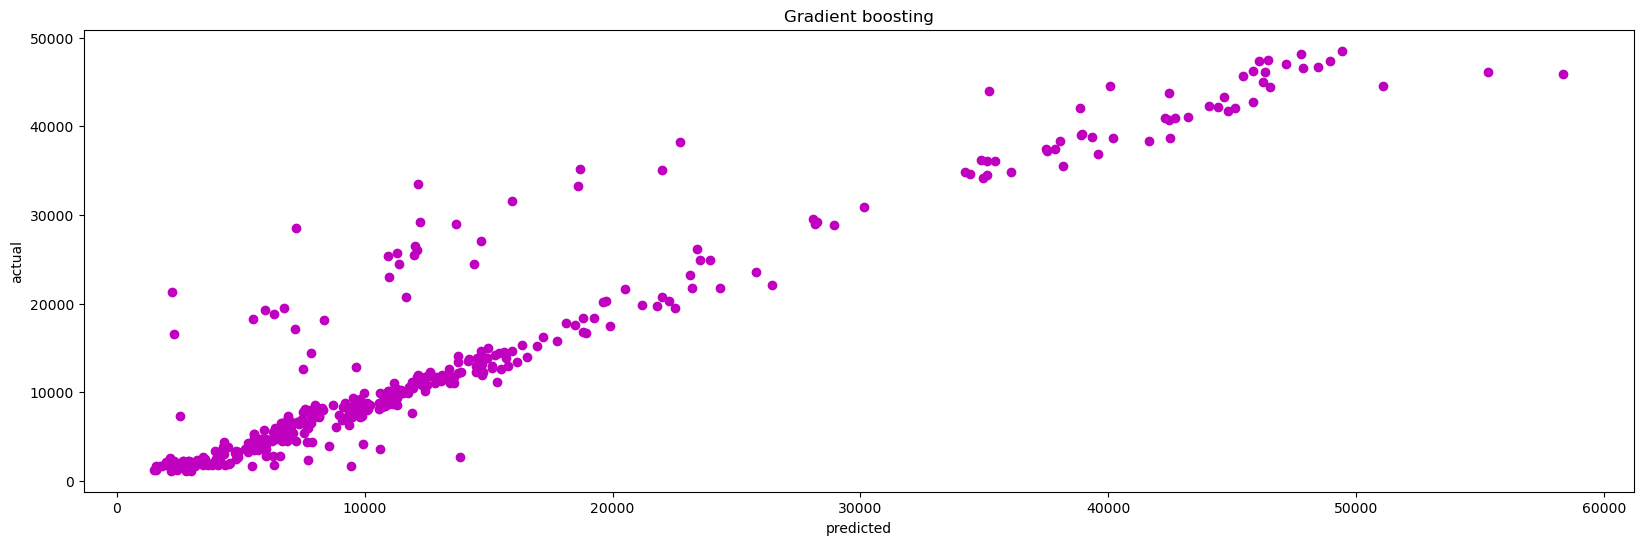

In [547]:
plt.figure(figsize=(20,6))
plt.scatter(x=predgb,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Gradient boosting')
plt.show()

In [548]:
#Lasso Model-

In [549]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.8037136273514844
r2_score on train data - 0.7220893626666363
mean absolute error-  4028.2223948344044
mean squared error-  31371317.53774842
root mean squared error-  5601.010403288716


In [550]:
#ScatterPlot bw predicted & actual values-

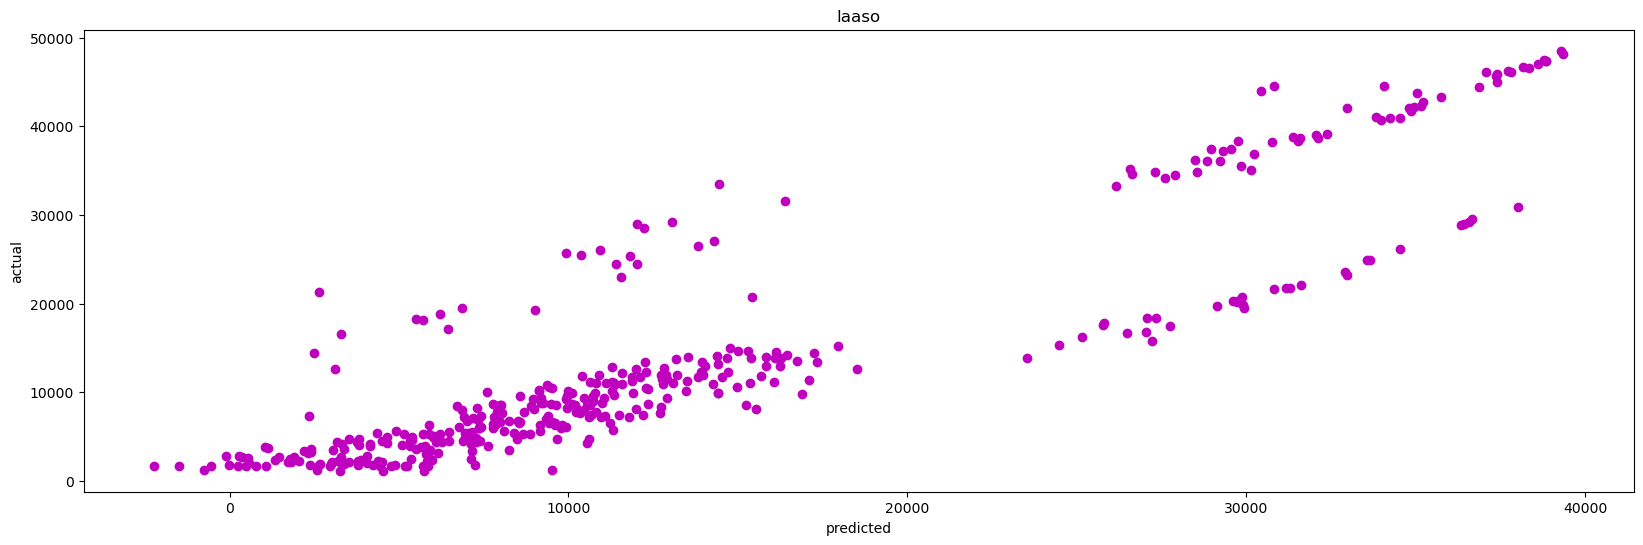

In [551]:
plt.figure(figsize=(20,6))
plt.scatter(x=predla,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('laaso')
plt.show()

In [552]:
#Ridge model-

In [553]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.8036212391791159
r2_score on train data - 0.7220885104805601
mean absolute error-  4030.0722648351066
mean squared error-  31386083.405867524
root mean squared error-  5602.328391469704


In [554]:
#ScatterPlot bw predicted & actual values-

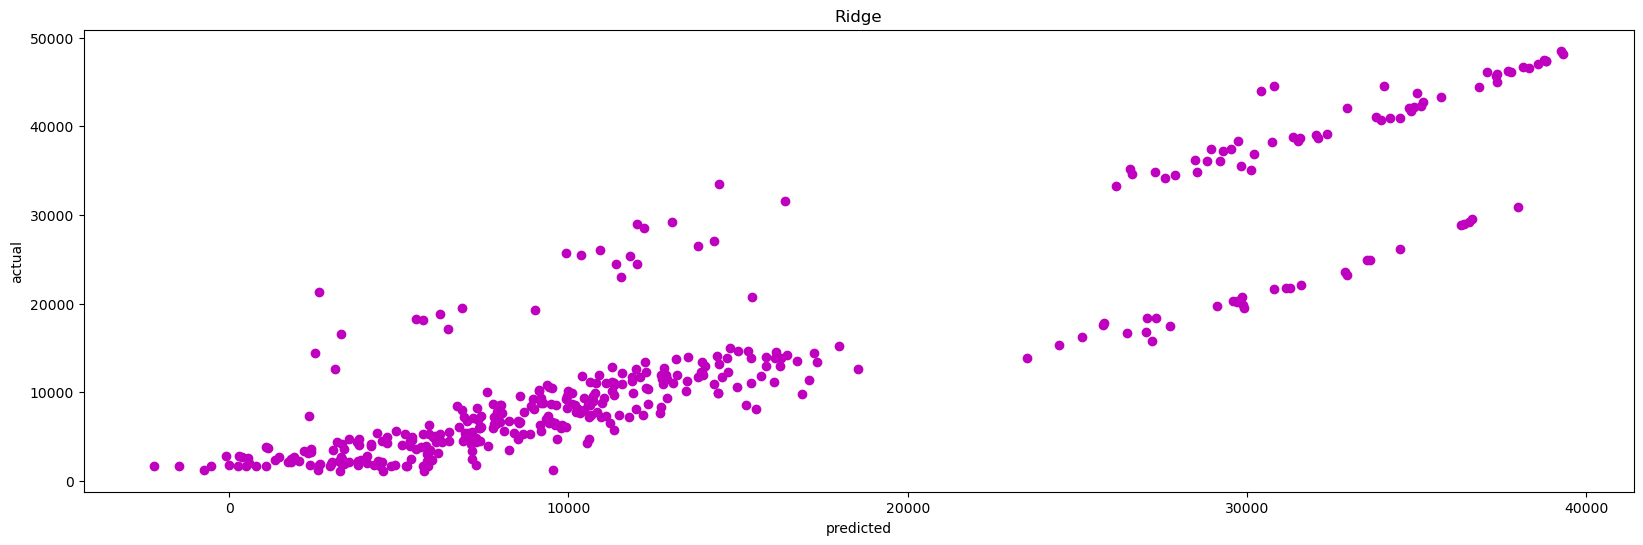

In [555]:
plt.figure(figsize=(20,6))
plt.scatter(x=predri,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Ridge')
plt.show()

In [556]:
#Decision tree regressor model-

In [557]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.7474302866828777
r2_score on train data - 1.0
mean absolute error-  3027.81207211194
mean squared error-  40366758.88385699
root mean squared error-  6353.483995718962


In [558]:
#ScatterPlot bw predicted & actual values-

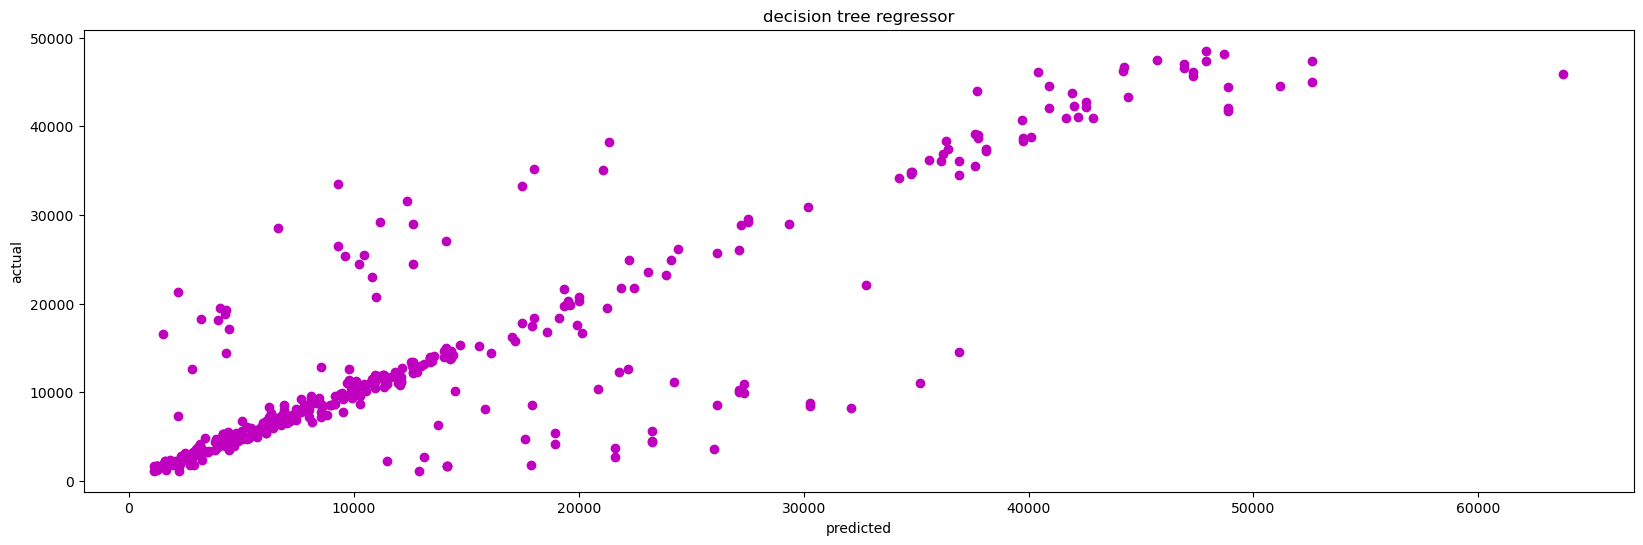

In [559]:
plt.figure(figsize=(20,6))
plt.scatter(x=preddt,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('decision tree regressor')
plt.show()

In [560]:
#Extra tree regressor model-

In [561]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.8391629267370199
r2_score on train data - 1.0
mean absolute error-  2636.347056943532
mean squared error-  25705660.70936669
root mean squared error-  5070.075020092571


In [562]:
#ScatterPlot bw predicted & actual values-

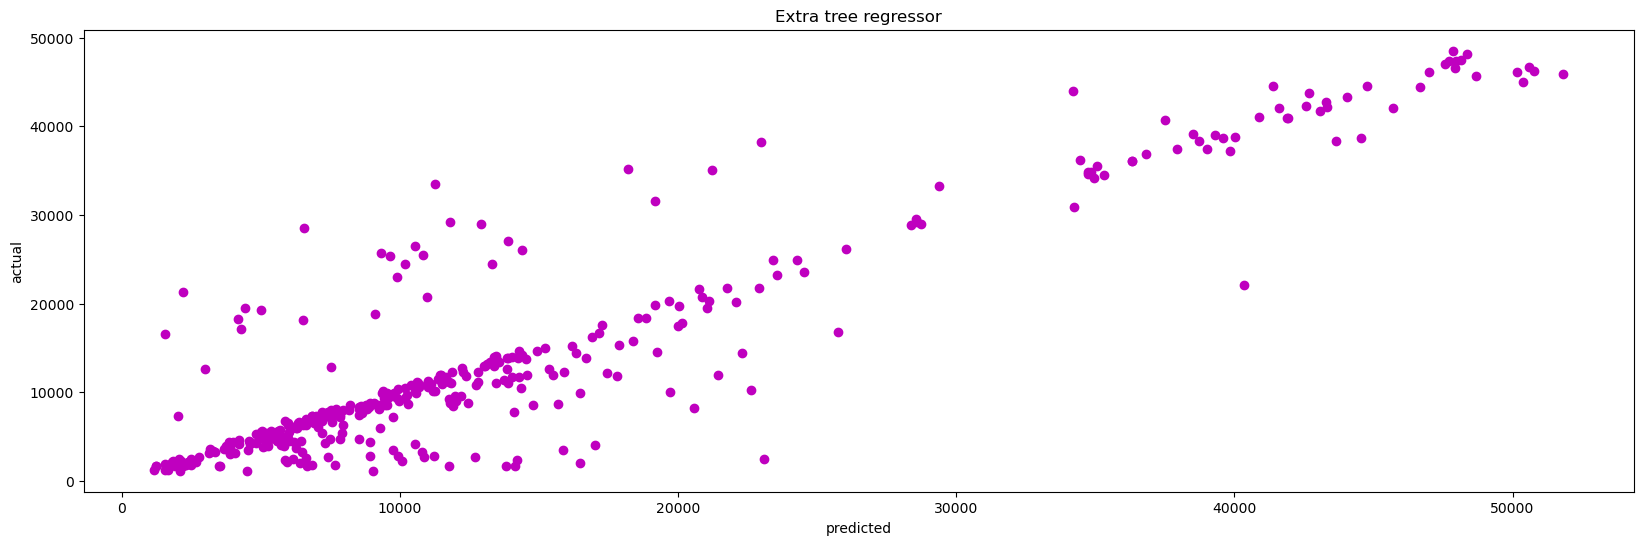

In [563]:
plt.figure(figsize=(20,6))
plt.scatter(x=predet,y=y_test,color='m')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Extra tree regressor')
plt.show()

In [564]:
#Cross validation score-

In [565]:
#Linear regression-

In [566]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predlr)-score.mean())*100)

[0.76097545 0.708749   0.77490537 0.73136787 0.75654975]
0.7465094900386388
difference bw r2_score and cross validation score is  5.721520204973418


In [567]:
#Random forest-

In [568]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predrf)-score1.mean())*100)

[0.84782484 0.76745363 0.85246649 0.82082956 0.83866651]
0.8254482060589229
difference bw r2_score and cross validation score is  4.161065609055092


In [569]:
#KNN-

In [570]:
score2=cross_val_score(kn,x,y)
print(score2)
print(score2.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predkn)-score2.mean())*100)

[0.15286682 0.10827194 0.00864919 0.20036372 0.17767484]
0.12956530023471696
difference bw r2_score and cross validation score is - 71.09753935610115


In [571]:
#Gradientboosting regressor-

In [572]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.87567719 0.79989642 0.8904894  0.84689159 0.85811705]
0.8542143278302927
difference bw r2_score and cross validation score is - 3.0829914966695515


In [573]:
# Lasso-

In [574]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.7609964  0.70877401 0.77489055 0.73138314 0.75654233]
0.7465172862269469
difference bw r2_score and cross validation score is-  5.719634112453753


In [575]:
#Ridge-

In [576]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.76114875 0.70909169 0.77426473 0.73171388 0.75629669]
0.7465031492918403
difference bw r2_score and cross validation score is - 5.7118089887275625


In [577]:
#Decision tree regressor-

In [578]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.71616262 0.65488068 0.726757   0.68594511 0.68203512]
0.693156106700712
difference bw r2_score and cross validation score is - 5.427417998216566


In [579]:
#Extra tree regressor-

In [580]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.81248493 0.73544634 0.83338094 0.80361268 0.81253778]
0.7994925325921077
difference bw r2_score and cross validation score is - 3.9670394144912136


Here i am selecting gradient boosting regressor as the best model which is giving test accuracy of 89%.

In [581]:
#Hyperparameter tunning-

In [582]:
param_grid={'criterion':['friedman_mse','squared_error'],'random_state':[10,20,40,50,60],'max_depth':[1,10,20,40],
            'n_estimators':[50,100,200],'min_samples_leaf':[3,5,8],'min_samples_split':[2,3,4,5,6],}

In [583]:
gs=GridSearchCV(gb,param_grid,cv=5)  
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 10, 20, 40],
                         'min_samples_leaf': [3, 5, 8],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200],
                         'random_state': [10, 20, 40, 50, 60]})

In [584]:
gs.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 20}

In [614]:
final_model2=GradientBoostingRegressor(criterion= 'friedman_mse',
 max_depth= 16,
 min_samples_leaf= 76,
 min_samples_split= 22,
 n_estimators= 50,
 random_state= 20)

In [615]:
final_model2.fit(x_train,y_train)
pred=final_model2.predict(x_test)
print('r2_score:', r2_score(y_test,pred))
print('mean absolute error- ',mean_absolute_error(y_test,pred))
print('mean squared error- ',mean_squared_error(y_test,pred))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.8915921542676651
mean absolute error-  2486.330231201003
mean squared error-  17326200.01156275
root mean squared error-  4162.475226540423


so with hypertunning the parameter i am getting 89.1% test accuracy.

In [616]:
pickle.dump(final_model2,open('insurance_cost2','wb'))

In [617]:
loaded_model=pickle.load(open('insurance_cost2','rb'))
result=loaded_model.score(x_test,y_test)
result

0.8915921542676651

In [618]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
predicted,24235.864509,1888.216823,5508.70764,3692.27575,19819.7272,7161.713609,6662.410297,44153.825523,2709.421493,44142.480457,...,24296.947514,2241.265894,11575.725308,9903.956699,38139.414326,5228.874846,45122.388934,6560.368274,6661.39281,38927.728001
actual,24873.384900,1241.565000,4751.07000,1748.77400,19719.6947,7046.722200,7358.175650,41676.081100,2130.675900,45710.207850,...,21771.342300,1909.527450,9861.025000,8825.086000,36021.011200,3292.529850,47403.880000,3443.064000,6238.29800,43753.337050


In [ ]:
#Model-3 By dropping sex and region column-

In [302]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [303]:
df1=df.drop(columns=['sex','region'],axis=1)
df1

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


In [304]:
x=df1.drop(columns=['charges'],axis=1)
y=df1.charges

In [305]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.44041773, -0.45315959, -0.90923416,  1.96966039],
       [-1.51164747,  0.50942165, -0.07944162, -0.50770174],
       [-0.79935006,  0.3831546 ,  1.58014347, -0.50770174],
       ...,
       [-1.51164747,  1.01448983, -0.90923416, -0.50770174],
       [-1.29795825, -0.79752426, -0.90923416, -0.50770174],
       [ 1.55123139, -0.26129928, -0.90923416,  1.96966039]])

In [306]:
#Model building-

In [307]:
random_state=0
accuracy=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predict=lr.predict(x_test)
    predictt=lr.predict(x_train)
    accu=r2_score(y_test,predict)
    accuu=r2_score(y_train,predictt)
    if accu>accuracy:
            accuracy=accu
            random_state=i
print('the best accuracy is;-',accuracy, 'and best random state is:-',random_state)        

the best accuracy is;- 0.804589892446962 and best random state is:- 599


In [308]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=599)

In [309]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.8009785614558967
r2_score on train data - 0.730149632314698
mean absolute error-  4026.898703238202
mean squared error-  31550227.623420876
root mean squared error-  5616.9589301881915


here i am getting test accuracy of 80%

In [310]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train)) 
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.86066646043233
r2_score on train data - 0.9739038549442538
mean absolute error-  2601.002905531557
mean squared error-  22088097.24768798
root mean squared error-  4699.797575182146


here i am getting test accuracy of 85.6%

In [311]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.8468254433508998
r2_score on train data - 0.8725417015458306
mean absolute error-  2924.597960808955
mean squared error-  24282269.10501785
root mean squared error-  4927.704242851619


here i am getting test accuracy of 84.6%

In [312]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.881569916721282
r2_score on train data - 0.8990548891905239
mean absolute error-  2420.146703238455
mean squared error-  18774339.650229342
root mean squared error-  4332.936608148028


here i am getting test accuracy of 88.2%

In [313]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.8009692371220679
r2_score on train data - 0.7301496051108107
mean absolute error-  4026.7946273677994
mean squared error-  31551705.780029975
root mean squared error-  5617.090508442068


here i am getting test accuracy of 80%

In [413]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.8009295222386077
r2_score on train data - 0.7301488524839665
mean absolute error-  4028.118533671728
mean squared error-  31558001.652587093
root mean squared error-  5617.650901630244


here i am getting test accuracy of 80%

In [414]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.7392009411947381
r2_score on train data - 0.999997469141602
mean absolute error-  3085.3505233402984
mean squared error-  41343634.78362934
root mean squared error-  6429.901615392676


here i am getting test accuracy of 74.6%

In [415]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.8174684633168324
r2_score on train data - 0.999997469141602
mean absolute error-  2769.8692696417907
mean squared error-  28936136.593799945
root mean squared error-  5379.231970625541


here i am getting test accuracy of 81.6%

In [416]:
#Cross validation score-

In [417]:
#Linear regression-

In [418]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predlr)-score.mean())*100)

[0.7614729  0.70879903 0.77558348 0.73135385 0.75675478]
0.7467928087718849
difference bw r2_score and cross validation score is  5.418575268401183


The cross val score for linear regression is 74.6%

In [419]:
#Random forest-

In [420]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predrf)-score1.mean())*100)

[0.84596625 0.76999918 0.857748   0.82383475 0.83462689]
0.8264350135340207
difference bw r2_score and cross validation score is  2.992113269668839


The cross val score for random forset regression is 82.4%

In [421]:
#Gradient boosting regressor-

In [422]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.87751593 0.80014282 0.8887873  0.84864679 0.86163662]
0.8553458909038497
difference bw r2_score and cross validation score is - 2.671256507957276


The cross val score for Gradient boosting regression is 85.5%

In [423]:
#Lasso-

In [424]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.76148459 0.70882132 0.77555186 0.73136853 0.756741  ]
0.7467934582121376
difference bw r2_score and cross validation score is-  5.41757789099303


The cross val score for lasso is 74.6%

In [425]:
#Ridge-

In [426]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.76164238 0.70913577 0.77498364 0.73169759 0.75648416]
0.7467887064634289
difference bw r2_score and cross validation score is - 5.414081577517882


The cross val score for Ridge is 74.6%

In [427]:
#Decision Tree-

In [428]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.72575916 0.64683779 0.72947016 0.7264773  0.72934976]
0.7115788345625655
difference bw r2_score and cross validation score is - 2.762210663217257


The cross val score for Decision Tree is 70.9%

In [429]:
#Extra tree regressor-

In [430]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.8019308  0.72394417 0.82571869 0.82391911 0.81553748]
0.7982100490128691
difference bw r2_score and cross validation score is - 1.9258414303963356


The cross val score for extratreeregressor is 79.3%

Here i can observe that GradientBoostingRegressor is our best model which is giving the accuracy of 88% with less errors than
other model so we will take this model for hyperparameter tunning.

In [431]:
#Hyperparameter tunning-

In [432]:
param_grid={'criterion':['friedman_mse','squared_error'],'random_state':[10,20,40,50,60],'max_depth':[1,10,20,40],
            'n_estimators':[50,100,200],'min_samples_leaf':[3,5,8],'min_samples_split':[2,3,4,5,6],}

In [396]:
gs=GridSearchCV(gb,param_grid,cv=5)  
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 10, 20, 40],
                         'min_samples_leaf': [3, 5, 8],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200],
                         'random_state': [10, 20, 40, 50, 60]})

In [433]:
gs.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 10}

In [459]:
final_model3=GradientBoostingRegressor(criterion= 'friedman_mse',
 max_depth= 10,
 min_samples_leaf= 35,
 min_samples_split= 2,
 n_estimators= 50,
 random_state= 100,max_leaf_nodes=50)

In [460]:
final_model3.fit(x_train,y_train)
pred=final_model3.predict(x_test)
print('r2_score:', r2_score(y_test,pred))
print('mean absolute error- ',mean_absolute_error(y_test,pred))
print('mean squared error- ',mean_squared_error(y_test,pred))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.884591774888914
mean absolute error-  2495.1923524788735
mean squared error-  18295294.208030134
root mean squared error-  4277.299873521862


After hyper parameterting the parameters i am getting maximum 88% test accuracy.

In [464]:
pickle.dump(final_model3,open('insurance_cost3','wb'))

In [465]:
loaded_model=pickle.load(open('insurance_cost3','rb'))
result=loaded_model.score(x_test,y_test)
result

0.884591774888914

In [466]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
predicted,24899.379967,1797.489305,6308.872984,4826.803827,21727.997966,5698.919927,6095.12972,45508.899872,2986.09874,45118.230202,...,21938.381247,39273.047284,14668.676732,11717.608727,14732.663103,18868.850169,5612.746854,16369.563462,8310.392956,12647.685689
actual,24873.384900,1241.565000,4751.070000,1748.774000,19719.694700,7046.722200,7358.17565,41676.081100,2130.67590,45710.207850,...,20773.627750,39047.285000,12629.165600,10579.711000,13822.803000,15820.699000,3861.209650,14001.133800,5354.074650,29186.482360


Here in both the models i can see there is very high mean absolte error and root mean squared erros so i will try different things 
and prepare more models

In [213]:
#Model No-4 By dropping region,sex & children column-

In [211]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [212]:
df.corr().charges.sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

dropping region sex & children column-

In [214]:
df=df.drop(columns=['region','sex','children'],axis=1)
df

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [215]:
df.skew()

age        0.054781
bmi        0.283914
smoker     1.463601
charges    1.515391
dtype: float64

smoker is categorical column so no worries with skewness in this column.

In [216]:
x=df.drop(columns=['charges'],axis=1)
y=df.charges

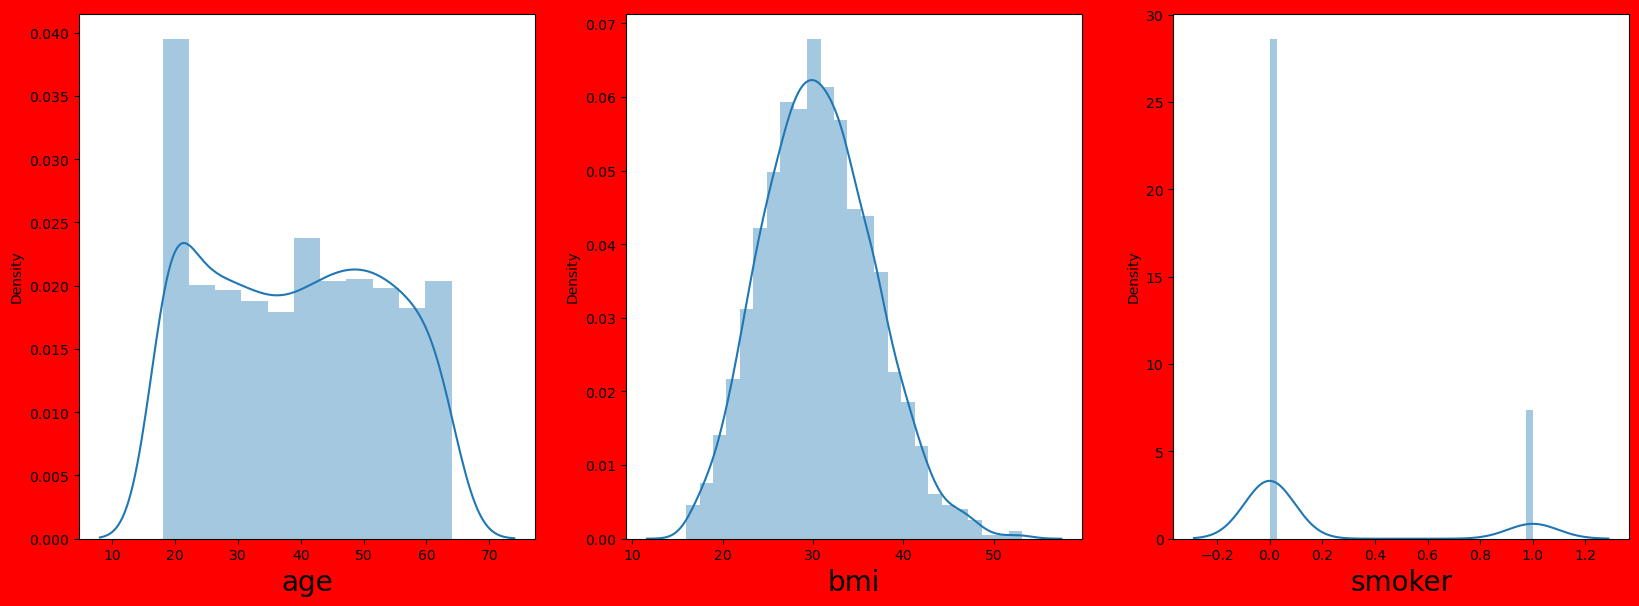

In [217]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

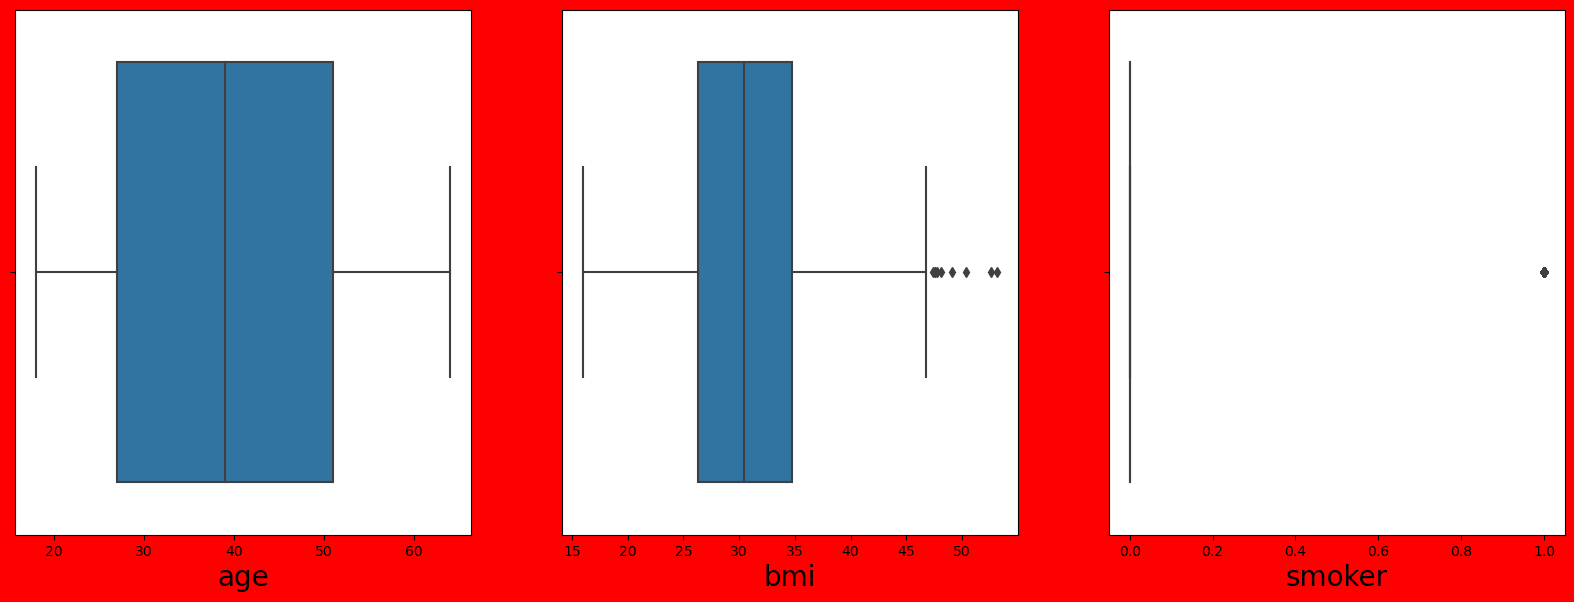

In [218]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

In [219]:
#Removal of outliers by IQR Method-

In [220]:
#upper side outliers-q3+(1.5*IQR)
#lower side outliers-q1-(1.5*IQR)


q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

In [221]:
bmi_high=q3.bmi+(1.5*IQR.bmi)

In [222]:
index=np.where(df['bmi']>bmi_high)
index

(array([ 116,  286,  401,  543,  846,  859, 1046, 1087, 1316], dtype=int64),)

In [223]:
df1=df.drop(df.index[index])
df1

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [224]:
print('data loss:- ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss:-  0.6731488406881078


data loss is only .67%

In [225]:
df1.skew()

age        0.057521
bmi        0.157141
smoker     1.470251
charges    1.500088
dtype: float64

skewness is under acceptable range.

In [226]:
x=df1.drop(columns=['charges'],axis=1)
y=df1.charges

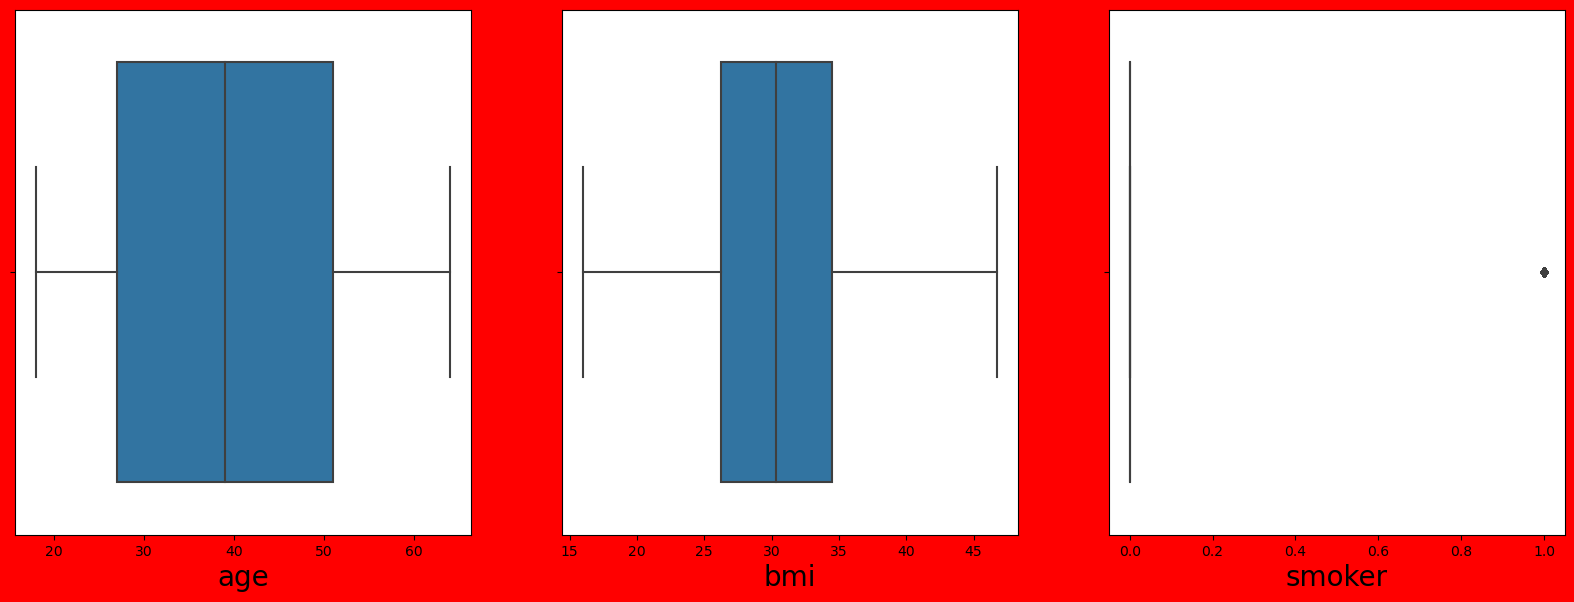

In [227]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

In [ ]:
so here we can see that outliers has been removed.

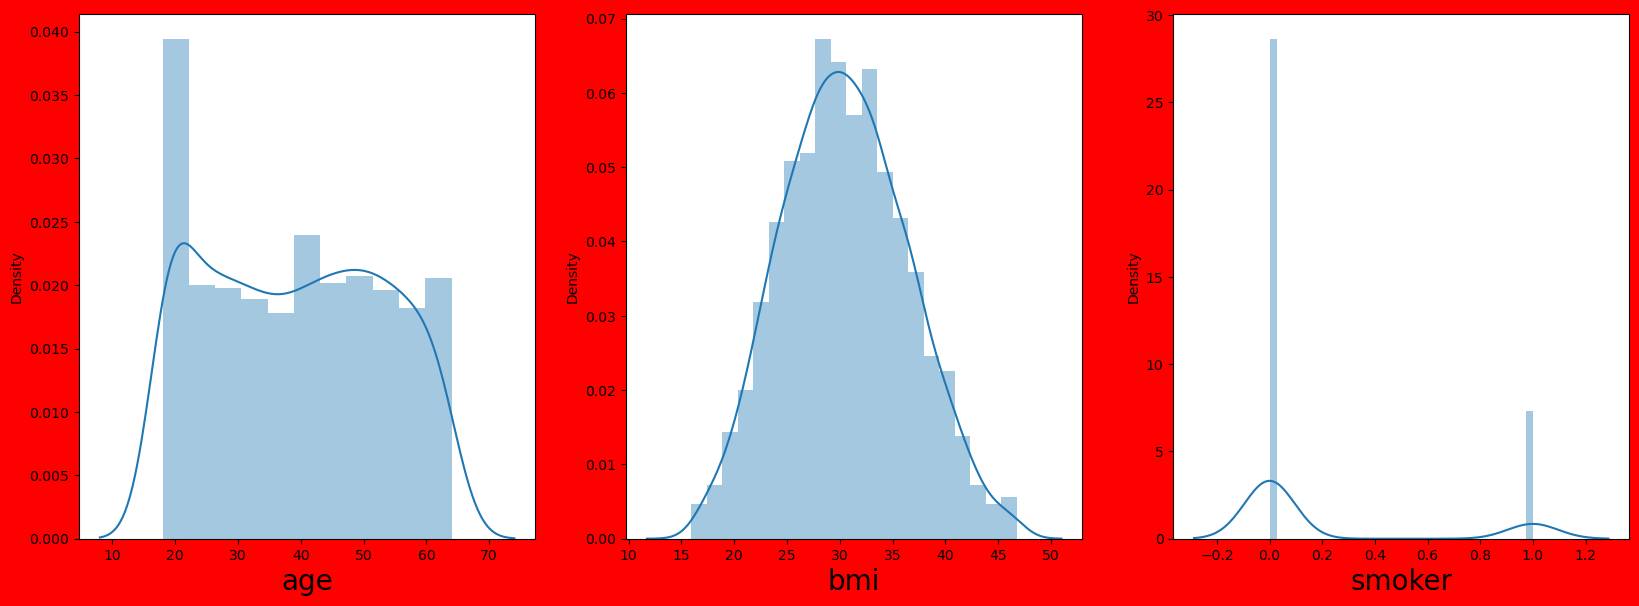

In [228]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=6:    #6 is total no of plots
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

In [ ]:
# lets apply power transformer method-

In [229]:
from sklearn.preprocessing import PowerTransformer

In [230]:
pt=PowerTransformer(method='yeo-johnson') 
x=pt.fit_transform(x)

In [234]:
x

array([[-1.52709784, -0.4154634 ,  1.97493519],
       [-1.6192818 ,  0.56983284, -0.50634573],
       [-0.76427794,  0.44438601, -0.50634573],
       ...,
       [-1.6192818 ,  1.06147005, -0.50634573],
       [-1.34783499, -0.78599365, -0.50634573],
       [ 1.46555899, -0.21344506,  1.97493519]])

In [233]:
x.shape

(1328, 3)

In [232]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1328, dtype: float64

In [236]:
#Model building-

In [242]:
random_state=0
accuracy=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predict=lr.predict(x_test)
    predictt=lr.predict(x_train)
    accu=r2_score(y_test,predict)
    accuu=r2_score(y_train,predictt)
    if accu>accuracy:
            accuracy=accu
            random_state=i
print('the best accuracy is;-',accuracy, 'and best random state is:-',random_state)        

the best accuracy is;- 0.8106696195702413 and best random state is:- 789


In [243]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=789)

In [244]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predlr))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predlr))
print('mean squared error- ',mean_squared_error(y_test,predlr))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predlr)))

r2_score on test data - 0.8061495891079217
r2_score on train data - 0.7236540558081638
mean absolute error-  3984.629943160309
mean squared error-  28248036.95661548
root mean squared error-  5314.8882355714195


In [247]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predrf))
print('r2_score on train data -', r2_score(y_train,pred_train)) 
print('mean absolute error- ',mean_absolute_error(y_test,predrf))
print('mean squared error- ',mean_squared_error(y_test,predrf))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predrf)))

r2_score on test data - 0.8329758374730792
r2_score on train data - 0.9675868355144019
mean absolute error-  3023.778381440849
mean squared error-  24338894.583694752
root mean squared error-  4933.446521823739


In [248]:
kn=KNN()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
pred_train=kn.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predkn))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predkn))
print('mean squared error- ',mean_squared_error(y_test,predkn))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predkn)))

r2_score on test data - 0.855410054908148
r2_score on train data - 0.8691088482392486
mean absolute error-  2842.046493330723
mean squared error-  21069762.47155607
root mean squared error-  4590.181093546971


In [249]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
pred_train=gb.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predgb))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predgb))
print('mean squared error- ',mean_squared_error(y_test,predgb))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predgb)))

r2_score on test data - 0.8875373399287169
r2_score on train data - 0.8882452994854887
mean absolute error-  2454.1273671368613
mean squared error-  16388148.796349606
root mean squared error-  4048.2278587487644


In [251]:
lasso=Lasso()
lasso.fit(x_train,y_train)
predla=lasso.predict(x_test)
pred_train=lasso.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,predla))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predla))
print('mean squared error- ',mean_squared_error(y_test,predla))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predla)))

r2_score on test data - 0.8061428370212955
r2_score on train data - 0.7236540357174914
mean absolute error-  3984.6536214236025
mean squared error-  28249020.87608034
root mean squared error-  5314.980797338814


In [252]:
rd=Ridge()
rd.fit(x_train,y_train)
predri=rd.predict(x_test)
pred_train=rd.predict(x_train)  
print('r2_score on test data -',r2_score(y_test,predri))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,predri))
print('mean squared error- ',mean_squared_error(y_test,predri))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predri)))

r2_score on test data - 0.8061009338372411
r2_score on train data - 0.7236532983666164
mean absolute error-  3986.4199156858776
mean squared error-  28255127.04158353
root mean squared error-  5315.555195986919


In [253]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)   
print('r2_score on test data -',r2_score(y_test,preddt))
print('r2_score on train data -', r2_score(y_train,pred_train))  
print('mean absolute error- ',mean_absolute_error(y_test,preddt))
print('mean squared error- ',mean_squared_error(y_test,preddt))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,preddt)))

r2_score on test data - 0.6844975530453696
r2_score on train data - 0.9959805052817552
mean absolute error-  3485.3377421837354
mean squared error-  45975268.973965414
root mean squared error-  6780.506542579648


In [256]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
predet=et.predict(x_test)
pred_train=et.predict(x_train)   #to know how my model working on training data.
print('r2_score on test data -',r2_score(y_test,predet))
print('r2_score on train data -', r2_score(y_train,pred_train))  #error is the diff bw actual data & predicted data.
print('mean absolute error- ',mean_absolute_error(y_test,predet))
print('mean squared error- ',mean_squared_error(y_test,predet))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,predet)))

r2_score on test data - 0.7763457721451503
r2_score on train data - 0.9959805052817552
mean absolute error-  3200.2664456061743
mean squared error-  32591073.007652156
root mean squared error-  5708.859168665151


In [257]:
#Cross validation score-

In [261]:
from sklearn.model_selection import cross_val_score

In [262]:
#Linear regression-

In [263]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predlr)-score.mean())*100)

[0.76082607 0.71166931 0.76638598 0.72116597 0.7529887 ]
0.74260720605643
difference bw r2_score and cross validation score is  6.354238305149162


In [264]:
#Random forest-

In [265]:
score1=cross_val_score(rf,x,y)
print(score1)
print(score1.mean())
print('difference bw r2_score and cross validation score is ',(r2_score(y_test,predrf)-score1.mean())*100)

[0.82777331 0.75503652 0.82602258 0.79994594 0.81732018]
0.8052197062795987
difference bw r2_score and cross validation score is  2.7756131193480527


In [267]:
#Gradient boosting regressor-

In [268]:
score3=cross_val_score(gb,x,y)
print(score3)
print(score3.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predgb)-score3.mean())*100)

[0.87358528 0.7895812  0.88356071 0.83455988 0.85561805]
0.8473810232253802
difference bw r2_score and cross validation score is - 4.015631670333663


In [269]:
#Lasso-

In [270]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference bw r2_score and cross validation score is- ',(r2_score(y_test,predla)-score4.mean())*100)

[0.76081959 0.7116837  0.76637856 0.72117452 0.75298377]
0.7426080263880079
difference bw r2_score and cross validation score is-  6.353481063328759


In [ ]:
#Ridge-

In [271]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predri)-score5.mean())*100)

[0.76082099 0.71174832 0.76630673 0.7212335  0.7529417 ]
0.7426102472531543
difference bw r2_score and cross validation score is - 6.349068658408685


In [272]:
#Decision tree-

In [273]:
score6=cross_val_score(dt,x,y)
print(score6)
print(score6.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,preddt)-score6.mean())*100)

[0.70295223 0.6391692  0.70174368 0.71177879 0.7015441 ]
0.6914375986889929
difference bw r2_score and cross validation score is - -0.6940045643623272


In [274]:
#Extra tree-

In [275]:
score8=cross_val_score(et,x,y)
print(score8)
print(score8.mean())
print('difference bw r2_score and cross validation score is -',(r2_score(y_test,predet)-score8.mean())*100)

[0.76828385 0.70922685 0.79986858 0.77134216 0.77746049]
0.7652363854661234
difference bw r2_score and cross validation score is - 1.1109386679026945


Here i can observe that GradientBoostingRegressor is our best model which is giving the accuracy of 88% with less errors than other model so we will take this model for hyperparameter tunning.

In [276]:
#Hyperparameter tunning-

In [277]:
param_grid={'criterion':['friedman_mse','squared_error'],'random_state':[10,20,40,50,60],'max_depth':[1,10,20,40],
            'n_estimators':[50,100,200],'min_samples_leaf':[3,5,8],'min_samples_split':[2,3,4,5,6],}

In [280]:
gs=GridSearchCV(gb,param_grid,cv=5)  
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 10, 20, 40],
                         'min_samples_leaf': [3, 5, 8],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200],
                         'random_state': [10, 20, 40, 50, 60]})

In [281]:
gs.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 10}

In [282]:
final_model4=GradientBoostingRegressor(criterion= 'friedman_mse',
 max_depth= 10,
 min_samples_leaf= 35,
 min_samples_split= 2,
 n_estimators= 50,
 random_state= 100,max_leaf_nodes=50)

In [283]:
final_model4.fit(x_train,y_train)
pred=final_model4.predict(x_test)
print('r2_score:', r2_score(y_test,pred))
print('mean absolute error- ',mean_absolute_error(y_test,pred))
print('mean squared error- ',mean_squared_error(y_test,pred))
print('root mean squared error- ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.8884757851626098
mean absolute error-  2578.0220439174054
mean squared error-  16251397.806105249
root mean squared error-  4031.3022469302955


In [286]:
pickle.dump(final_model4,open('insurance_cost4','wb'))

In [287]:
loaded_model=pickle.load(open('insurance_cost4','rb'))
result=loaded_model.score(x_test,y_test)
result

0.8884757851626098

In [288]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,322,323,324,325,326,327,328,329,330,331
predicted,25612.747768,18540.50295,3552.314158,35214.365943,19479.883839,8252.025123,4046.152085,11450.670739,21970.761587,5490.445197,...,14234.486931,43728.159726,9582.934653,15721.33821,7331.277001,2950.187801,5083.812779,5572.91139,7236.34307,11499.073759
actual,25678.778450,19361.99880,1880.070000,36124.573700,19107.779600,7443.643050,2719.279750,19749.383380,21880.820000,3732.625100,...,12495.290850,46200.985100,9301.893550,13224.69300,5662.225000,1135.940700,2680.949300,4137.52270,28476.73499,12430.953350


so after hypertunning the parameter we got 88% accuracy